In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
%matplotlib inline
np.random.seed(12)


import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import SGD
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),TQDMNotebookCallback()]

In [72]:
#read the csv file and drop the unnamed column
df = pd.read_csv('diamonds.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [81]:
#limit price range to $3000
df = df[df.price < 3000]

## Visualizations

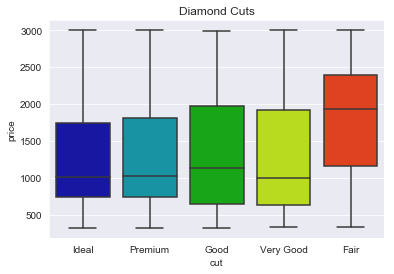

In [88]:
#Diamond Cuts
sns.set_style('darkgrid')
sns.boxplot(y='price',x='cut',data=df,palette = 'nipy_spectral');
plt.title('Diamond Cuts');

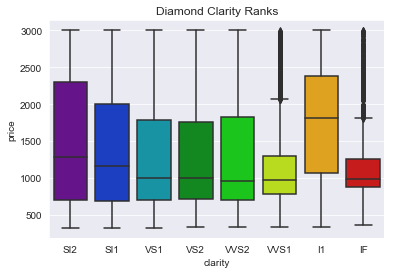

In [89]:
#Diamond Clarity
sns.boxplot(y='price',x='clarity',data=df,palette = 'nipy_spectral');
plt.title('Diamond Clarity Ranks');

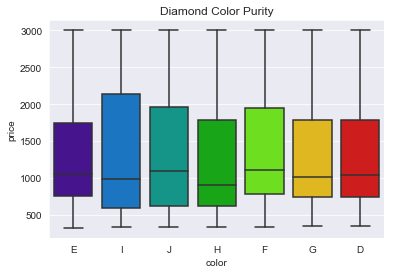

In [90]:
#Diamond Color/Clearness
sns.boxplot(y='price',x='color',data=df,palette = 'nipy_spectral');
plt.title('Diamond Color Purity');

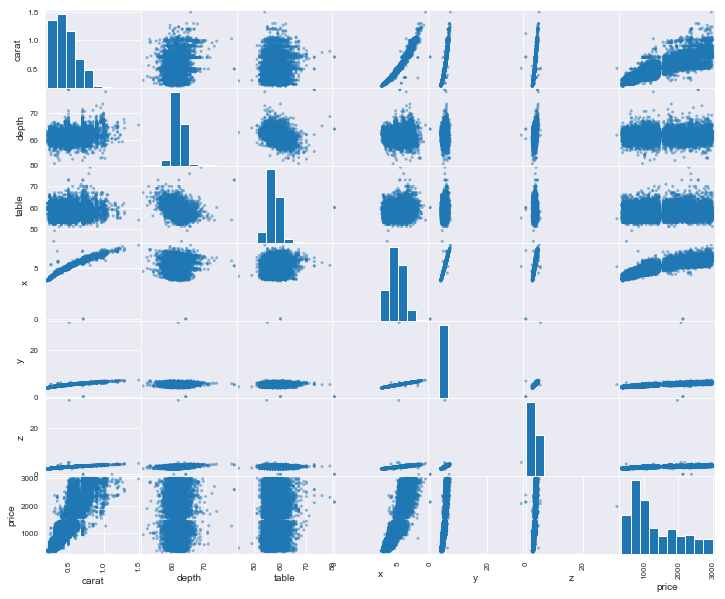

In [107]:
#create a scatter plot of all continuous variables
continuous_var = ['carat','depth','table','x','y','z','price']
pd.plotting.scatter_matrix(df[continuous_var],figsize=(12,10));


In [ ]:
#convert categorical variables to dummy columns
df = pd.get_dummies(df,drop_first=True)

In [4]:
#create X and y dataframes
X = df.drop('price',axis=1)
y = df['price']

In [5]:
#instantiate the min and max scalers
mm = MinMaxScaler()
ss = StandardScaler()

In [6]:
#split the dataset into a train and test and set a split size and random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [7]:
#transform the X train and test with Standard scalers
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [8]:
#instantiate Linear Regression then fit and predict
model = LinearRegression()
model.fit(X_train,y_train)

ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

In [9]:
#print out the MSE and R2
print('MSE Train:',mean_squared_error(y_train,ytrain_pred), 'MSE Test:',mean_squared_error(y_test,ytest_pred))
print('R2 Train:',r2_score(y_train,ytrain_pred),'R2 Test:', r2_score(y_test,ytest_pred))

MSE Train: 34937.9500292992 MSE Test: 36777.269233048966
R2 Train: 0.9318507502351661 R2 Test: 0.9281579663289184


In [10]:
#fit XGBOOST, then predict
clfX = XGBRegressor()
clfX.fit(X_train,y_train, verbose=True)
ytrain_pred = clfX.predict(X_train)
ytest_pred = clfX.predict(X_test)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:27:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
#print out the MSE and R2
print('MSE Train:',mean_squared_error(y_train,ytrain_pred), 'MSE Test:',mean_squared_error(y_test,ytest_pred))
print('R2 Train:',r2_score(y_train,ytrain_pred),'R2 Test:', r2_score(y_test,ytest_pred))

MSE Train: 25824.791992638882 MSE Test: 27456.563724539013
R2 Train: 0.9496266896553652 R2 Test: 0.9463653659794307


In [12]:
#fit Gradient Boosted Trees, then predict
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
ytrain_pred = gbr.predict(X_train)
ytest_pred = gbr.predict(X_test)

In [13]:
#print out the MSE and R2
#print out the MSE and R2
print('MSE Train:',mean_squared_error(y_train,ytrain_pred), 'MSE Test:',mean_squared_error(y_test,ytest_pred))
print('R2 Train:',r2_score(y_train,ytrain_pred),'R2 Test:', r2_score(y_test,ytest_pred))

MSE Train: 25743.5774961963 MSE Test: 27217.229156715945
R2 Train: 0.9497851049887762 R2 Test: 0.946832890688001


In [14]:
#Random forest with some parameters to stop overfitting, then predict
rf = RandomForestRegressor(n_estimators=100,max_depth=16,max_features=6,min_samples_split=8,min_samples_leaf=6)
rf.fit(X_train,y_train)
ytrain_pred = rf.predict(X_train)
ytest_pred = rf.predict(X_test)


In [15]:
#print out the MSE and R2
print('MSE Train:',mean_squared_error(y_train,ytrain_pred), 'MSE Test:',mean_squared_error(y_test,ytest_pred))
print('R2 Train:',r2_score(y_train,ytrain_pred),'R2 Test:', r2_score(y_test,ytest_pred))

MSE Train: 17174.19139493924 MSE Test: 23586.328922038694
R2 Train: 0.9665003740087422 R2 Test: 0.953925621126008


In [45]:
def model1_maker(X_train,y_train,X_test,y_test,epochs):  
    n_cols = X_train.shape[1]

    # Set up the model: model
    model1 = Sequential()

    # Add the first layer
    model1.add(Dense(12,  input_shape=(n_cols,)))


    # Add the second layer
    model1.add(Dense(32,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1)))


    model1.add(Dense(64,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.4) ))
    model1.add(Dense(64,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.3) ))



    model1.add(Dense(64,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.5) ))
    model1.add(Dense(64,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.4) ))

    model1.add(Dense(32,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1)))

    model1.add(Dense(16,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1)))

    # Add the output layer
    model1.add(Dense(1))

    model1.compile(optimizer='adam',loss='mean_squared_error')
    history1 = model1.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test,y_test),verbose=2,callbacks=callbacks)
    
    
    training_loss = history1.history['loss']
    test_loss = history1.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize accuracy history
    fig = plt.figure(figsize=(12,8))
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.ylim(top=40000)
    plt.show();
    
    return model1, history1

In [46]:
def model2_maker(X_train,y_train,X_test,y_test,epochs):  
    n_cols = X_train.shape[1]

    # Set up the model: model
    model2 = Sequential()

    # Add the first layer
    model2.add(Dense(32, activation='relu',kernel_initializer = 'uniform', input_shape=(n_cols,)))

    # Add the second layer
    model2.add(Dense(64,kernel_initializer = 'uniform',activation='relu'))

    model2.add(Dense(128,kernel_initializer = 'uniform',activation='relu',kernel_regularizer=regularizers.l2(0.1)))

    model2.add(Dense(64,activation='relu',kernel_initializer = 'uniform'))


    model2.add(Dense(32,activation='relu',kernel_initializer = 'uniform'))

    # Add the output layer
    model2.add(Dense(1))

    model2.compile(optimizer='adam',loss='mean_squared_error')

    history2 = model2.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)
    
    
    training_loss = history2.history['loss']
    test_loss = history2.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize accuracy history
    fig = plt.figure(figsize=(12,8))
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.ylim(top=40000)
    plt.show();
    
    
    return model2, history2

In [47]:
def model3_maker(X_train,y_train,X_test,y_test,epochs):  
    n_cols = X_train.shape[1]

    # Set up the model: model
    model3 = Sequential()

    # Add the first layer
    model3.add(Dense(128, activation='relu',kernel_initializer = keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.3), input_shape=(n_cols,)))

    model3.add(Dense(256,kernel_initializer = keras.initializers.glorot_uniform(seed=1),activation='relu',kernel_regularizer=regularizers.l2(0.3)))

    model3.add(Dense(256,kernel_initializer = keras.initializers.glorot_uniform(seed=1),activation='relu',kernel_regularizer=regularizers.l2(0.3)))

    model3.add(Dense(128,activation='relu',kernel_initializer = keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.3)))

    model3.add(Dense(64,activation='relu',kernel_initializer = keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    # Add the output layer
    model3.add(Dense(1))
    model3.compile(optimizer='adam',loss='mean_squared_error')

    history3 = model3.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)
    
    
    training_loss = history3.history['loss']
    test_loss = history3.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize accuracy history
    fig = plt.figure(figsize=(12,8))
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.ylim(top=40000)
    plt.show();
    
    return model3, history3

In [48]:
def model4_maker(X_train,y_train,X_test,y_test,epochs):      
    n_cols = X_train.shape[1]

    # Set up the model: model
    model4 = Sequential()

    # Add the first layer
    model4.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.3) ,kernel_initializer = keras.initializers.glorot_normal(seed=1), input_shape=(n_cols,)))


    model4.add(Dense(32,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    model4.add(Dense(64,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    model4.add(Dense(128,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    model4.add(Dense(64,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))

    model4.add(Dense(32,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))

    model4.add(Dense(16,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    # Add the output layer
    model4.add(Dense(1))
    model4.compile(optimizer='adam',loss='mean_squared_error')
    history4 = model4.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)

    
    training_loss = history4.history['loss']
    test_loss = history4.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize accuracy history
    fig = plt.figure(figsize=(12,8))
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.ylim(top=40000)
    plt.show();
    
    return model4, history4

In [49]:
def model5_maker(X_train,y_train,X_test,y_test,epochs):  
    n_cols = X_train.shape[1]

    # Set up the model: model
    model5 = Sequential()

    # Add the first layer
    model5.add(Dense(32,activation='linear',kernel_regularizer=regularizers.l2(0.3) ,kernel_initializer = keras.initializers.glorot_normal(seed=1), input_shape=(n_cols,)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))

    model5.add(Dense(32,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))


    model5.add(Dense(64,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))


    model5.add(Dense(128,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))


    model5.add(Dense(64,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))

    model5.add(Dense(32,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))

    model5.add(Dense(16,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))


    # Add the output layer
    model5.add(Dense(1))
    model5.compile(optimizer='adam',loss='mean_squared_error')
    history5 = model5.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)

    training_loss = history5.history['loss']
    test_loss = history5.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize accuracy history
    fig = plt.figure(figsize=(12,8))
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.ylim(top=40000)
    plt.show();
    return model5, history5

In [50]:
def model6_maker(X_train,y_train,X_test,y_test,epochs):     
    n_cols = X_train.shape[1]

    # Set up the model: model
    model6 = Sequential()

    # Add6the first layer
    model6.add(Dense(32, activation='relu',kernel_initializer = keras.initializers.glorot_normal(seed=None), input_shape=(n_cols,)))

    model6.add(Dense(32,kernel_initializer = keras.initializers.glorot_normal(seed=None),activation='relu'))

    model6.add(Dense(64,kernel_initializer = keras.initializers.glorot_normal(seed=None),activation='relu'))

    model6.add(Dense(128,activation='relu',kernel_initializer = keras.initializers.glorot_normal(seed=None),kernel_regularizer=regularizers.l2(0.1)))

    model6.add(Dense(64,kernel_initializer = keras.initializers.glorot_normal(seed=None),activation='relu'))

    model6.add(Dense(32,activation='relu',kernel_initializer = keras.initializers.glorot_normal(seed=None)))

    model6.add(Dense(16,kernel_initializer = keras.initializers.glorot_normal(seed=None),activation='relu'))

    # Add6the output layer
    model6.add(Dense(1))

    model6.compile(optimizer='adam',loss='mean_squared_error')
    history6 = model6.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)
    
    training_loss = history6.history['loss']
    test_loss = history6.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize accuracy history
    fig = plt.figure(figsize=(12,8))
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.ylim(top=40000)
    plt.show();
    
    
    return model6, history6

In [51]:
def ensemble_layer(preds_train,preds_test,y_train,y_test,epochs):
    n_cols = preds_train.shape[1]

    # Set up the model: model
    model_ensemble = Sequential()

    # Add the first layer
    model_ensemble.add(Dense(6, activation='relu',kernel_initializer = keras.initializers.glorot_normal(seed=1), input_shape=(n_cols,)))

    model_ensemble.add(Dense(6,kernel_initializer = keras.initializers.glorot_normal(seed=1),activation='relu'))



    # Add the output layer
    model_ensemble.add(Dense(1))

    model_ensemble.compile(optimizer='adam',loss='mean_squared_error')
    history_ensemble = model_ensemble.fit(preds_train,y_train,epochs=epochs,batch_size=64,
                                          validation_data=(preds_test, y_test),verbose=2,callbacks=callbacks)
    
    training_loss = history_ensemble.history['loss']
    test_loss = history_ensemble.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize accuracy history
    fig = plt.figure(figsize=(12,8))
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.ylim(top=40000)
    plt.show();
    
    
    return model_ensemble,history_ensemble

In [52]:
def stack_ensemble(X_train,y_train,X_test,y_test,epochs):
    model1,history1 = model1_maker(X_train,y_train,X_test,y_test,epochs)
    model2,history2 = model2_maker(X_train,y_train,X_test,y_test,epochs)
    model3,history3 = model3_maker(X_train,y_train,X_test,y_test,epochs)
    model4,history4 = model4_maker(X_train,y_train,X_test,y_test,epochs)
    model5,history5 = model5_maker(X_train,y_train,X_test,y_test,epochs)
    model6,history6 = model6_maker(X_train,y_train,X_test,y_test,epochs)
    
    predictions1_train = pd.DataFrame(model1.predict(X_train))
    predictions2_train = pd.DataFrame(model2.predict(X_train))
    predictions3_train = pd.DataFrame(model3.predict(X_train))
    predictions4_train = pd.DataFrame(model4.predict(X_train))
    predictions5_train = pd.DataFrame(model5.predict(X_train))
    predictions6_train = pd.DataFrame(model6.predict(X_train))
    
    predictions1_test= pd.DataFrame(model1.predict(X_test))
    predictions2_test= pd.DataFrame(model2.predict(X_test))
    predictions3_test= pd.DataFrame(model3.predict(X_test))
    predictions4_test= pd.DataFrame(model4.predict(X_test))
    predictions5_test= pd.DataFrame(model5.predict(X_test))
    predictions6_test= pd.DataFrame(model6.predict(X_test))
    
    
    train_preds = pd.concat([predictions1_train,predictions2_train,predictions3_train,predictions4_train,
                        predictions5_train,predictions6_train],axis=1)
    test_preds = pd.concat([predictions1_test,predictions2_test,predictions3_test,predictions4_test,
                        predictions5_test,predictions6_test],axis=1)
    train_preds = ss.fit_transform(train_preds)
    test_preds = ss.transform(test_preds)
    
    model_ensemble, history_ensemble = ensemble_layer(train_preds,test_preds,y_train,y_test,epochs)
    
    return model_ensemble, history_ensemble, train_preds, test_preds

# Run all the models indivdually then together

In [54]:
epochs=120

Train on 24267 samples, validate on 6067 samples


Epoch 1/100


 - 2s - loss: 422388.1035 - val_loss: 50156.4947
Epoch 2/100


 - 1s - loss: 70169.1763 - val_loss: 35138.8511
Epoch 3/100


 - 1s - loss: 43413.6851 - val_loss: 29799.4003
Epoch 4/100


 - 1s - loss: 34548.2069 - val_loss: 27817.9666
Epoch 5/100


 - 1s - loss: 29757.7255 - val_loss: 27187.4198
Epoch 6/100


 - 1s - loss: 27142.9569 - val_loss: 26011.7910
Epoch 7/100


 - 1s - loss: 25554.5211 - val_loss: 24854.0890
Epoch 8/100


 - 1s - loss: 24813.6920 - val_loss: 24301.3522
Epoch 9/100


 - 1s - loss: 24088.1462 - val_loss: 25792.0258
Epoch 10/100


 - 1s - loss: 23623.5929 - val_loss: 25094.7129
Epoch 11/100


 - 1s - loss: 23130.7488 - val_loss: 23874.9287
Epoch 12/100


 - 1s - loss: 22587.0833 - val_loss: 27005.6660
Epoch 13/100


 - 1s - loss: 22407.5409 - val_loss: 23097.8642
Epoch 14/100


 - 1s - loss: 22087.5464 - val_loss: 23851.8217
Epoch 15/100


 - 1s - loss: 21934.9796 - val_loss: 22789.4589
Epoch 16/100


 - 1s - loss: 21565.9390 - val_loss: 22127.3641
Epoch 17/100


 - 1s - loss: 21211.5744 - val_loss: 23060.8112
Epoch 18/100


 - 1s - loss: 20792.7435 - val_loss: 22719.9284
Epoch 19/100


 - 1s - loss: 21020.7177 - val_loss: 32403.7929
Epoch 20/100


 - 1s - loss: 20850.7843 - val_loss: 21152.8332
Epoch 21/100


 - 1s - loss: 20254.4807 - val_loss: 20944.1243
Epoch 22/100


 - 1s - loss: 19944.4703 - val_loss: 21254.7205
Epoch 23/100


 - 1s - loss: 19647.8266 - val_loss: 23194.0502
Epoch 24/100


 - 1s - loss: 19408.8038 - val_loss: 22764.2924
Epoch 25/100


 - 1s - loss: 19504.7952 - val_loss: 20866.0402
Epoch 26/100


 - 1s - loss: 19270.9520 - val_loss: 21357.4409
Epoch 27/100


 - 1s - loss: 19174.9760 - val_loss: 21491.3611
Epoch 28/100


 - 1s - loss: 18851.5178 - val_loss: 19762.7619
Epoch 29/100


 - 1s - loss: 18607.8168 - val_loss: 20168.8274
Epoch 30/100


 - 1s - loss: 18332.6630 - val_loss: 19498.9468
Epoch 31/100


 - 1s - loss: 18318.8089 - val_loss: 19883.3448
Epoch 32/100


 - 1s - loss: 18369.7266 - val_loss: 19710.9590
Epoch 33/100


 - 1s - loss: 18121.4587 - val_loss: 21267.6671
Epoch 34/100


 - 1s - loss: 18070.5915 - val_loss: 19076.8927
Epoch 35/100


 - 1s - loss: 17794.8385 - val_loss: 19451.0654
Epoch 36/100


 - 1s - loss: 17950.6147 - val_loss: 20604.7642
Epoch 37/100


 - 1s - loss: 17609.7040 - val_loss: 19513.4519
Epoch 38/100


 - 1s - loss: 18114.2812 - val_loss: 21693.0291
Epoch 39/100


 - 1s - loss: 18400.9754 - val_loss: 19480.3332
Epoch 40/100


 - 1s - loss: 17433.7194 - val_loss: 18747.6303
Epoch 41/100


 - 1s - loss: 17675.8139 - val_loss: 19067.8797
Epoch 42/100


 - 1s - loss: 17474.9103 - val_loss: 18836.5226
Epoch 43/100


 - 1s - loss: 17385.5637 - val_loss: 18900.7939
Epoch 44/100


 - 1s - loss: 17913.1526 - val_loss: 19293.1286
Epoch 45/100


 - 1s - loss: 17224.1085 - val_loss: 18392.9154
Epoch 46/100


 - 1s - loss: 17522.7541 - val_loss: 19361.9164
Epoch 47/100


 - 1s - loss: 17227.4555 - val_loss: 20861.2805
Epoch 48/100


 - 1s - loss: 17017.7626 - val_loss: 18189.1161
Epoch 49/100


 - 1s - loss: 17083.2622 - val_loss: 18976.8273
Epoch 50/100


 - 1s - loss: 17157.7075 - val_loss: 19563.8051
Epoch 51/100


 - 1s - loss: 16823.3135 - val_loss: 18637.9559
Epoch 52/100


 - 1s - loss: 17059.8223 - val_loss: 20590.1220
Epoch 53/100


 - 1s - loss: 16947.0973 - val_loss: 18334.7516
Epoch 54/100


 - 1s - loss: 16701.3637 - val_loss: 18438.1965
Epoch 55/100


 - 1s - loss: 16812.5477 - val_loss: 22253.8512
Epoch 56/100


 - 1s - loss: 17271.6521 - val_loss: 20542.1504
Epoch 57/100


 - 1s - loss: 16692.4943 - val_loss: 18467.1362
Epoch 58/100


 - 1s - loss: 16652.7707 - val_loss: 18486.9239


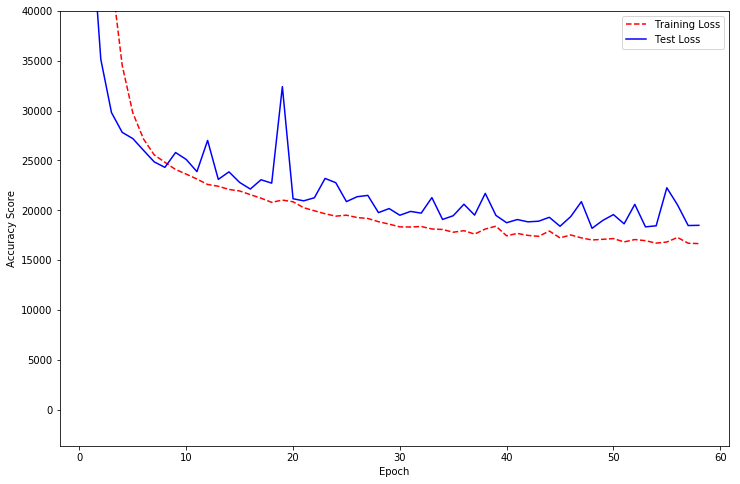

In [37]:
model1,history1 = model1_maker(X_train,y_train,X_test,y_test,epochs)    

Train on 24267 samples, validate on 6067 samples


Epoch 1/100


 - 2s - loss: 490869.8257 - val_loss: 42176.6582
Epoch 2/100


 - 1s - loss: 61941.3433 - val_loss: 33389.5139
Epoch 3/100


 - 1s - loss: 44147.8383 - val_loss: 29949.4483
Epoch 4/100


 - 1s - loss: 35634.8138 - val_loss: 29701.8566
Epoch 5/100


 - 1s - loss: 30383.5156 - val_loss: 26068.4368
Epoch 6/100


 - 1s - loss: 27121.7931 - val_loss: 26855.7718
Epoch 7/100


 - 1s - loss: 25204.7704 - val_loss: 24269.5230
Epoch 8/100


 - 1s - loss: 24033.6056 - val_loss: 24051.8706
Epoch 9/100


 - 1s - loss: 23180.0356 - val_loss: 23687.2861
Epoch 10/100


 - 1s - loss: 22980.8363 - val_loss: 24064.1264
Epoch 11/100


 - 1s - loss: 22525.1514 - val_loss: 25772.2234
Epoch 12/100


 - 1s - loss: 22320.8050 - val_loss: 24109.7745
Epoch 13/100


 - 1s - loss: 22084.3801 - val_loss: 24299.4621
Epoch 14/100


 - 1s - loss: 22050.6191 - val_loss: 22842.0828
Epoch 15/100


 - 1s - loss: 22186.2924 - val_loss: 22651.7395
Epoch 16/100


 - 1s - loss: 21921.5054 - val_loss: 23258.7536
Epoch 17/100


 - 1s - loss: 22105.1540 - val_loss: 22655.6884
Epoch 18/100


 - 1s - loss: 22096.2095 - val_loss: 25011.6560
Epoch 19/100


 - 1s - loss: 22229.4664 - val_loss: 23282.1771
Epoch 20/100


 - 1s - loss: 21885.2964 - val_loss: 22550.1054
Epoch 21/100


 - 1s - loss: 21840.0812 - val_loss: 22570.2316
Epoch 22/100


 - 1s - loss: 21712.9646 - val_loss: 22655.3463
Epoch 23/100


 - 1s - loss: 21877.3451 - val_loss: 23717.4560
Epoch 24/100


 - 1s - loss: 21792.9543 - val_loss: 22775.0621
Epoch 25/100


 - 1s - loss: 21678.2098 - val_loss: 22483.2485
Epoch 26/100


 - 1s - loss: 21921.1911 - val_loss: 22711.7894
Epoch 27/100


 - 1s - loss: 21801.2486 - val_loss: 22487.7620
Epoch 28/100


 - 1s - loss: 21603.3616 - val_loss: 24724.6657
Epoch 29/100


 - 1s - loss: 21607.9776 - val_loss: 22962.8640
Epoch 30/100


 - 1s - loss: 21877.6321 - val_loss: 22827.6813
Epoch 31/100


 - 1s - loss: 21416.3475 - val_loss: 22034.7569
Epoch 32/100


 - 1s - loss: 21344.3051 - val_loss: 22161.2832
Epoch 33/100


 - 1s - loss: 21618.4091 - val_loss: 22337.6182
Epoch 34/100


 - 1s - loss: 21433.5886 - val_loss: 23543.8786
Epoch 35/100


 - 1s - loss: 21399.0968 - val_loss: 22249.7884
Epoch 36/100


 - 1s - loss: 21399.1819 - val_loss: 22739.5658
Epoch 37/100


 - 1s - loss: 21362.7800 - val_loss: 24686.9633
Epoch 38/100


 - 1s - loss: 21265.9711 - val_loss: 21908.7363
Epoch 39/100


 - 1s - loss: 21287.0815 - val_loss: 22783.3669
Epoch 40/100


 - 1s - loss: 21146.6454 - val_loss: 21843.2866
Epoch 41/100


 - 1s - loss: 21309.5366 - val_loss: 21683.8702
Epoch 42/100


 - 1s - loss: 21132.0201 - val_loss: 22111.9235
Epoch 43/100


 - 1s - loss: 21298.2398 - val_loss: 21907.4815
Epoch 44/100


 - 1s - loss: 20906.1341 - val_loss: 22589.7956
Epoch 45/100


 - 1s - loss: 21120.8973 - val_loss: 26100.5743
Epoch 46/100


 - 1s - loss: 21098.0583 - val_loss: 23405.5668
Epoch 47/100


 - 1s - loss: 21174.4467 - val_loss: 22330.5240
Epoch 48/100


 - 1s - loss: 21004.6979 - val_loss: 21864.9035
Epoch 49/100


 - 1s - loss: 20832.2978 - val_loss: 21838.4579
Epoch 50/100


 - 1s - loss: 20683.3173 - val_loss: 21595.9404
Epoch 51/100


 - 1s - loss: 20388.0108 - val_loss: 21456.6767
Epoch 52/100


 - 1s - loss: 20301.9778 - val_loss: 21680.5365
Epoch 53/100


 - 1s - loss: 20114.7542 - val_loss: 21351.2920
Epoch 54/100


 - 1s - loss: 20100.8251 - val_loss: 21490.1232
Epoch 55/100


 - 1s - loss: 20045.9668 - val_loss: 22588.2161
Epoch 56/100


 - 1s - loss: 19781.5844 - val_loss: 20769.8145
Epoch 57/100


 - 1s - loss: 19708.6620 - val_loss: 20769.9451
Epoch 58/100


 - 1s - loss: 19747.9473 - val_loss: 22635.4347
Epoch 59/100


 - 1s - loss: 19595.1223 - val_loss: 20460.5056
Epoch 60/100


 - 1s - loss: 19506.1972 - val_loss: 21897.7115
Epoch 61/100


 - 1s - loss: 19575.6139 - val_loss: 20492.8129
Epoch 62/100


 - 1s - loss: 19678.7427 - val_loss: 20273.1486
Epoch 63/100


 - 1s - loss: 19283.2241 - val_loss: 21093.6638
Epoch 64/100


 - 1s - loss: 19445.2826 - val_loss: 20230.2668
Epoch 65/100


 - 1s - loss: 19312.3009 - val_loss: 20895.1271
Epoch 66/100


 - 1s - loss: 19208.4513 - val_loss: 20286.9134
Epoch 67/100


 - 2s - loss: 19126.6735 - val_loss: 20163.5649
Epoch 68/100


 - 1s - loss: 19223.8835 - val_loss: 20517.2911
Epoch 69/100


 - 2s - loss: 18932.5739 - val_loss: 20380.8738
Epoch 70/100


 - 1s - loss: 18945.2855 - val_loss: 20784.0417
Epoch 71/100


 - 1s - loss: 19137.5037 - val_loss: 20901.7791
Epoch 72/100


 - 2s - loss: 19007.6900 - val_loss: 20405.9342
Epoch 73/100


 - 1s - loss: 18852.2284 - val_loss: 19823.5974
Epoch 74/100


 - 1s - loss: 18803.1583 - val_loss: 21330.8680
Epoch 75/100


 - 1s - loss: 18757.7360 - val_loss: 19699.4586
Epoch 76/100


 - 1s - loss: 18625.5625 - val_loss: 19936.1415
Epoch 77/100


 - 1s - loss: 18623.7024 - val_loss: 19662.2946
Epoch 78/100


 - 1s - loss: 18806.1803 - val_loss: 19940.8529
Epoch 79/100


 - 1s - loss: 18275.8946 - val_loss: 19399.3018
Epoch 80/100


 - 1s - loss: 18493.3194 - val_loss: 19258.8291
Epoch 81/100


 - 1s - loss: 18295.5782 - val_loss: 19046.6278
Epoch 82/100


 - 1s - loss: 17976.0227 - val_loss: 19294.6060
Epoch 83/100


 - 1s - loss: 18030.7299 - val_loss: 19557.9569
Epoch 84/100


 - 1s - loss: 17709.8228 - val_loss: 20365.6093
Epoch 85/100


 - 1s - loss: 17408.2578 - val_loss: 19346.9059
Epoch 86/100


 - 1s - loss: 17501.2235 - val_loss: 18830.5123
Epoch 87/100


 - 1s - loss: 17301.4540 - val_loss: 18632.0667
Epoch 88/100


 - 1s - loss: 17646.5849 - val_loss: 20746.9056
Epoch 89/100


 - 1s - loss: 17443.4806 - val_loss: 19245.7773
Epoch 90/100


 - 1s - loss: 17070.8085 - val_loss: 19180.9111
Epoch 91/100


 - 1s - loss: 16848.1898 - val_loss: 18197.7775
Epoch 92/100


 - 1s - loss: 16854.5011 - val_loss: 18970.4034
Epoch 93/100


 - 1s - loss: 16789.2662 - val_loss: 18069.8597
Epoch 94/100


 - 1s - loss: 16651.9746 - val_loss: 18068.1519
Epoch 95/100


 - 1s - loss: 16382.1226 - val_loss: 18743.7643
Epoch 96/100


 - 1s - loss: 16464.8445 - val_loss: 18036.1835
Epoch 97/100


 - 1s - loss: 16374.4178 - val_loss: 17345.5243
Epoch 98/100


 - 1s - loss: 16486.0214 - val_loss: 17526.6370
Epoch 99/100


 - 1s - loss: 16359.0768 - val_loss: 17278.6027
Epoch 100/100


 - 1s - loss: 16051.6529 - val_loss: 17506.5581


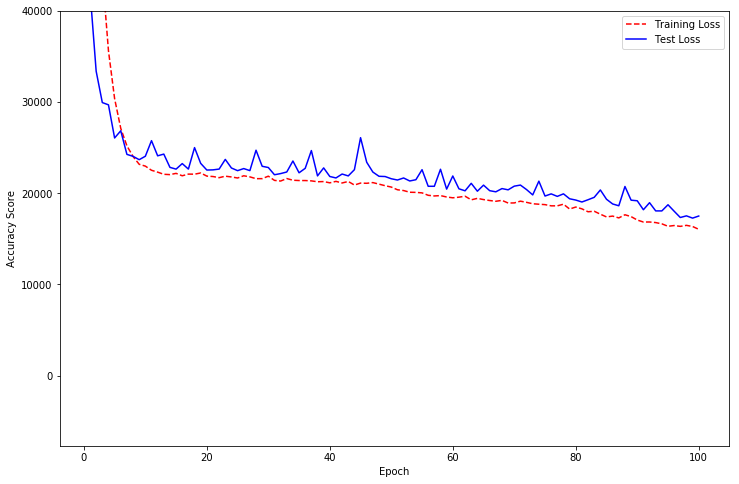

In [38]:
model2,history2 = model2_maker(X_train,y_train,X_test,y_test,epochs)

Train on 24267 samples, validate on 6067 samples


Epoch 1/100


 - 3s - loss: 299888.3879 - val_loss: 39258.3814
Epoch 2/100


 - 2s - loss: 72718.7804 - val_loss: 31818.4084
Epoch 3/100


 - 2s - loss: 48246.7150 - val_loss: 29044.9120
Epoch 4/100


 - 2s - loss: 34450.7328 - val_loss: 26719.8079
Epoch 5/100


 - 2s - loss: 29254.7813 - val_loss: 25600.0268
Epoch 6/100


 - 2s - loss: 25448.2328 - val_loss: 25097.4272
Epoch 7/100


 - 2s - loss: 23283.5370 - val_loss: 22985.2137
Epoch 8/100


 - 2s - loss: 21825.4837 - val_loss: 22518.4423
Epoch 9/100


 - 2s - loss: 20919.4601 - val_loss: 22521.6229
Epoch 10/100


 - 2s - loss: 20274.1674 - val_loss: 21506.1742
Epoch 11/100


 - 2s - loss: 19709.2190 - val_loss: 20590.8765
Epoch 12/100


 - 2s - loss: 19454.0651 - val_loss: 23070.2616
Epoch 13/100


 - 2s - loss: 19677.0233 - val_loss: 21800.2229
Epoch 14/100


 - 2s - loss: 18824.7619 - val_loss: 20216.6255
Epoch 15/100


 - 2s - loss: 18702.3561 - val_loss: 20187.4656
Epoch 16/100


 - 2s - loss: 18472.5773 - val_loss: 19370.2380
Epoch 17/100


 - 2s - loss: 18326.7476 - val_loss: 19721.9661
Epoch 18/100


 - 2s - loss: 18354.3778 - val_loss: 19283.6412
Epoch 19/100


 - 2s - loss: 17878.6024 - val_loss: 19218.1224
Epoch 20/100


 - 2s - loss: 17733.2637 - val_loss: 19941.0252
Epoch 21/100


 - 2s - loss: 17731.7549 - val_loss: 26531.9474
Epoch 22/100


 - 2s - loss: 17666.2745 - val_loss: 20574.4349
Epoch 23/100


 - 2s - loss: 17679.8776 - val_loss: 18424.7191
Epoch 24/100


 - 2s - loss: 16813.4704 - val_loss: 17903.1723
Epoch 25/100


 - 2s - loss: 16767.8509 - val_loss: 25116.2671
Epoch 26/100


 - 2s - loss: 16589.5223 - val_loss: 18668.5831
Epoch 27/100


 - 2s - loss: 16627.8085 - val_loss: 18958.6893
Epoch 28/100


 - 2s - loss: 16602.5881 - val_loss: 17828.5043
Epoch 29/100


 - 2s - loss: 16081.3776 - val_loss: 17404.6643
Epoch 30/100


 - 2s - loss: 15831.5713 - val_loss: 19613.4248
Epoch 31/100


 - 2s - loss: 16008.6979 - val_loss: 17526.4534
Epoch 32/100


 - 2s - loss: 16099.3233 - val_loss: 17185.5200
Epoch 33/100


 - 2s - loss: 15573.3663 - val_loss: 17576.7396
Epoch 34/100


 - 2s - loss: 15402.2550 - val_loss: 17716.3111
Epoch 35/100


 - 2s - loss: 15328.4279 - val_loss: 21089.3286
Epoch 36/100


 - 2s - loss: 15779.2822 - val_loss: 17375.8738
Epoch 37/100


 - 2s - loss: 15441.4220 - val_loss: 16942.1201
Epoch 38/100


 - 2s - loss: 15057.5343 - val_loss: 17036.9653
Epoch 39/100


 - 2s - loss: 14938.9027 - val_loss: 17692.6470
Epoch 40/100


 - 2s - loss: 14739.5001 - val_loss: 16756.4504
Epoch 41/100


 - 2s - loss: 14681.1893 - val_loss: 17170.2156
Epoch 42/100


 - 2s - loss: 14759.7239 - val_loss: 17072.4212
Epoch 43/100


 - 2s - loss: 14701.0151 - val_loss: 16603.1968
Epoch 44/100


 - 2s - loss: 14315.9107 - val_loss: 16754.4221
Epoch 45/100


 - 2s - loss: 14686.9989 - val_loss: 18098.5953
Epoch 46/100


 - 2s - loss: 14343.4638 - val_loss: 16624.9882
Epoch 47/100


 - 2s - loss: 14554.4740 - val_loss: 16684.5896
Epoch 48/100


 - 2s - loss: 14158.5903 - val_loss: 16461.3462
Epoch 49/100


 - 2s - loss: 14065.1791 - val_loss: 16056.6486
Epoch 50/100


 - 2s - loss: 14032.6653 - val_loss: 16023.6834
Epoch 51/100


 - 2s - loss: 14084.4631 - val_loss: 16159.4782
Epoch 52/100


 - 2s - loss: 13992.6126 - val_loss: 16035.8620
Epoch 53/100


 - 2s - loss: 14148.2508 - val_loss: 18219.2466
Epoch 54/100


 - 2s - loss: 13960.8595 - val_loss: 15875.1642
Epoch 55/100


 - 2s - loss: 13785.2452 - val_loss: 16049.0284
Epoch 56/100


 - 2s - loss: 13690.4646 - val_loss: 15674.5851
Epoch 57/100


 - 2s - loss: 13916.2156 - val_loss: 15893.0156
Epoch 58/100


 - 2s - loss: 13684.3432 - val_loss: 15378.4666
Epoch 59/100


 - 2s - loss: 14030.4419 - val_loss: 16116.5315
Epoch 60/100


 - 2s - loss: 13526.1087 - val_loss: 16305.2275
Epoch 61/100


 - 2s - loss: 13668.2096 - val_loss: 16009.2493
Epoch 62/100


 - 2s - loss: 13857.1768 - val_loss: 18814.9383
Epoch 63/100


 - 2s - loss: 13460.7463 - val_loss: 16150.3884
Epoch 64/100


 - 2s - loss: 13264.6511 - val_loss: 17993.8532
Epoch 65/100


 - 2s - loss: 13585.5157 - val_loss: 15837.7137
Epoch 66/100


 - 2s - loss: 13455.3386 - val_loss: 15612.4123
Epoch 67/100


 - 2s - loss: 13752.8147 - val_loss: 15415.9697
Epoch 68/100


 - 2s - loss: 13435.5172 - val_loss: 15746.2313


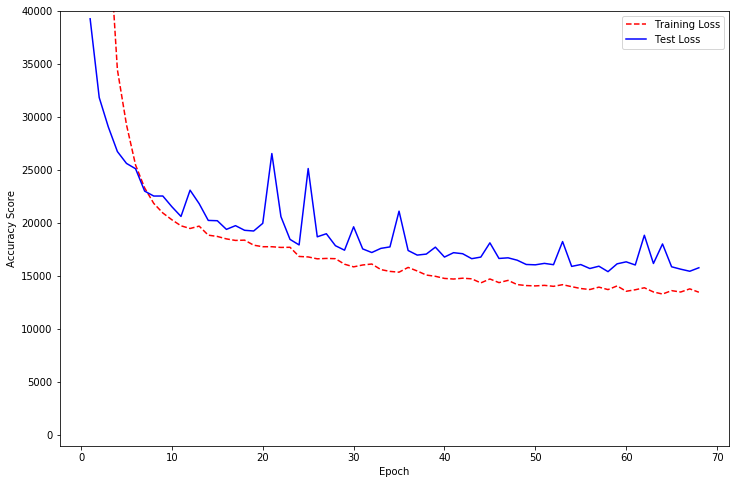

In [39]:
model3,history3 = model3_maker(X_train,y_train,X_test,y_test,epochs)

Train on 24267 samples, validate on 6067 samples


Epoch 1/100


 - 2s - loss: 440193.0723 - val_loss: 45759.9247
Epoch 2/100


 - 1s - loss: 63670.8473 - val_loss: 34242.9125
Epoch 3/100


 - 1s - loss: 46043.8014 - val_loss: 29845.0779
Epoch 4/100


 - 1s - loss: 35488.4412 - val_loss: 29287.5212
Epoch 5/100


 - 1s - loss: 29296.8208 - val_loss: 25051.6074
Epoch 6/100


 - 1s - loss: 25595.3680 - val_loss: 23912.8416
Epoch 7/100


 - 1s - loss: 23441.1855 - val_loss: 23653.3307
Epoch 8/100


 - 1s - loss: 22391.1582 - val_loss: 23035.1077
Epoch 9/100


 - 1s - loss: 21465.0914 - val_loss: 22450.0003
Epoch 10/100


 - 1s - loss: 21223.9130 - val_loss: 22799.4379
Epoch 11/100


 - 1s - loss: 20734.0483 - val_loss: 22763.3336
Epoch 12/100


 - 1s - loss: 20516.4499 - val_loss: 21265.1571
Epoch 13/100


 - 1s - loss: 20018.5525 - val_loss: 26069.3693
Epoch 14/100


 - 1s - loss: 19958.0990 - val_loss: 22663.5578
Epoch 15/100


 - 1s - loss: 20002.0637 - val_loss: 21783.2764
Epoch 16/100


 - 2s - loss: 19648.3331 - val_loss: 21234.6112
Epoch 17/100


 - 1s - loss: 19696.4863 - val_loss: 20614.0132
Epoch 18/100


 - 1s - loss: 19239.3593 - val_loss: 20096.7091
Epoch 19/100


 - 1s - loss: 19244.7846 - val_loss: 20520.1506
Epoch 20/100


 - 1s - loss: 19268.7669 - val_loss: 22337.4657
Epoch 21/100


 - 1s - loss: 19122.0287 - val_loss: 19746.9511
Epoch 22/100


 - 1s - loss: 19117.2406 - val_loss: 20755.7120
Epoch 23/100


 - 1s - loss: 18904.9631 - val_loss: 22923.7272
Epoch 24/100


 - 1s - loss: 18519.7837 - val_loss: 20939.7193
Epoch 25/100


 - 1s - loss: 18412.4306 - val_loss: 23894.2499
Epoch 26/100


 - 1s - loss: 18258.7094 - val_loss: 20563.3089
Epoch 27/100


 - 1s - loss: 18353.2851 - val_loss: 20667.8732
Epoch 28/100


 - 2s - loss: 18421.0413 - val_loss: 19684.2573
Epoch 29/100


 - 1s - loss: 18063.2797 - val_loss: 18886.2629
Epoch 30/100


 - 1s - loss: 17912.3637 - val_loss: 18611.0145
Epoch 31/100


 - 1s - loss: 17962.7155 - val_loss: 21331.5291
Epoch 32/100


 - 2s - loss: 17733.4459 - val_loss: 19118.7223
Epoch 33/100


 - 2s - loss: 17524.9103 - val_loss: 19115.2378
Epoch 34/100


 - 1s - loss: 17465.7853 - val_loss: 18298.9042
Epoch 35/100


 - 1s - loss: 17573.5243 - val_loss: 20250.9639
Epoch 36/100


 - 1s - loss: 17401.6076 - val_loss: 18289.4216
Epoch 37/100


 - 1s - loss: 16901.8156 - val_loss: 18627.6708
Epoch 38/100


 - 1s - loss: 17017.8825 - val_loss: 18355.5207
Epoch 39/100


 - 1s - loss: 16921.1289 - val_loss: 18884.4575
Epoch 40/100


 - 1s - loss: 16906.8372 - val_loss: 17655.4217
Epoch 41/100


 - 1s - loss: 16977.6815 - val_loss: 18466.3891
Epoch 42/100


 - 1s - loss: 16698.0221 - val_loss: 18026.5179
Epoch 43/100


 - 1s - loss: 16634.4109 - val_loss: 18205.1974
Epoch 44/100


 - 1s - loss: 16735.2843 - val_loss: 18090.9315
Epoch 45/100


 - 1s - loss: 16413.2290 - val_loss: 20162.5035
Epoch 46/100


 - 1s - loss: 16250.2180 - val_loss: 17574.2432
Epoch 47/100


 - 1s - loss: 15998.3752 - val_loss: 17359.5239
Epoch 48/100


 - 1s - loss: 16147.3268 - val_loss: 18215.5741
Epoch 49/100


 - 1s - loss: 16348.4075 - val_loss: 20004.3311
Epoch 50/100


 - 1s - loss: 15967.7849 - val_loss: 17969.0391
Epoch 51/100


 - 1s - loss: 16139.4821 - val_loss: 17300.5163
Epoch 52/100


 - 1s - loss: 15818.0851 - val_loss: 16845.1423
Epoch 53/100


 - 1s - loss: 15671.6044 - val_loss: 16583.4705
Epoch 54/100


 - 1s - loss: 15698.1172 - val_loss: 16890.2059
Epoch 55/100


 - 1s - loss: 15483.3149 - val_loss: 16865.8476
Epoch 56/100


 - 1s - loss: 15357.9113 - val_loss: 18460.3819
Epoch 57/100


 - 1s - loss: 15350.5861 - val_loss: 16426.2515
Epoch 58/100


 - 1s - loss: 15606.5706 - val_loss: 16790.8005
Epoch 59/100


 - 1s - loss: 15304.6329 - val_loss: 17260.7632
Epoch 60/100


 - 1s - loss: 15245.1756 - val_loss: 19500.6170
Epoch 61/100


 - 1s - loss: 15382.6761 - val_loss: 16532.2330
Epoch 62/100


 - 1s - loss: 15154.3345 - val_loss: 19663.3414
Epoch 63/100


 - 1s - loss: 15626.8343 - val_loss: 16417.9753
Epoch 64/100


 - 1s - loss: 15089.4143 - val_loss: 17176.1445
Epoch 65/100


 - 1s - loss: 14939.5373 - val_loss: 16409.1417
Epoch 66/100


 - 1s - loss: 15184.4784 - val_loss: 16130.2022
Epoch 67/100


 - 1s - loss: 15130.7883 - val_loss: 16166.1071
Epoch 68/100


 - 1s - loss: 14932.5273 - val_loss: 16055.4377
Epoch 69/100


 - 1s - loss: 14872.3156 - val_loss: 17732.3569
Epoch 70/100


 - 1s - loss: 15087.5819 - val_loss: 16238.6019
Epoch 71/100


 - 1s - loss: 14858.2502 - val_loss: 16842.4330
Epoch 72/100


 - 1s - loss: 14823.0075 - val_loss: 17327.4644
Epoch 73/100


 - 1s - loss: 14842.0628 - val_loss: 22191.8531
Epoch 74/100


 - 1s - loss: 14657.8829 - val_loss: 17093.6875
Epoch 75/100


 - 1s - loss: 15018.7764 - val_loss: 15994.1254
Epoch 76/100


 - 1s - loss: 14813.0198 - val_loss: 18429.3292
Epoch 77/100


 - 1s - loss: 14632.4414 - val_loss: 15892.4977
Epoch 78/100


 - 1s - loss: 14681.9363 - val_loss: 15940.7150
Epoch 79/100


 - 1s - loss: 14635.5167 - val_loss: 16317.1604
Epoch 80/100


 - 1s - loss: 14251.9850 - val_loss: 19157.2585
Epoch 81/100


 - 1s - loss: 14598.9552 - val_loss: 16485.6769
Epoch 82/100


 - 1s - loss: 14453.3786 - val_loss: 16679.4148
Epoch 83/100


 - 1s - loss: 14380.0596 - val_loss: 16043.8327
Epoch 84/100


 - 1s - loss: 14551.0999 - val_loss: 15936.0806
Epoch 85/100


 - 1s - loss: 14381.1910 - val_loss: 15900.5535
Epoch 86/100


 - 1s - loss: 14342.6522 - val_loss: 15833.1753
Epoch 87/100


 - 1s - loss: 14405.3036 - val_loss: 15631.8724
Epoch 88/100


 - 1s - loss: 14451.5690 - val_loss: 15560.5786
Epoch 89/100


 - 1s - loss: 14150.9181 - val_loss: 17816.5116
Epoch 90/100


 - 1s - loss: 14249.6246 - val_loss: 15660.3000
Epoch 91/100


 - 1s - loss: 14349.4695 - val_loss: 16796.1381
Epoch 92/100


 - 1s - loss: 14228.3193 - val_loss: 15884.1852
Epoch 93/100


 - 1s - loss: 14266.2898 - val_loss: 16768.7723
Epoch 94/100


 - 1s - loss: 14297.7978 - val_loss: 18433.2260
Epoch 95/100


 - 1s - loss: 14453.1411 - val_loss: 15762.0716
Epoch 96/100


 - 1s - loss: 14213.0381 - val_loss: 15997.8797
Epoch 97/100


 - 1s - loss: 14060.0391 - val_loss: 16481.8906
Epoch 98/100


 - 1s - loss: 14225.6912 - val_loss: 15519.3832
Epoch 99/100


 - 1s - loss: 14124.2425 - val_loss: 16592.0535
Epoch 100/100


 - 1s - loss: 14153.7668 - val_loss: 20435.2561


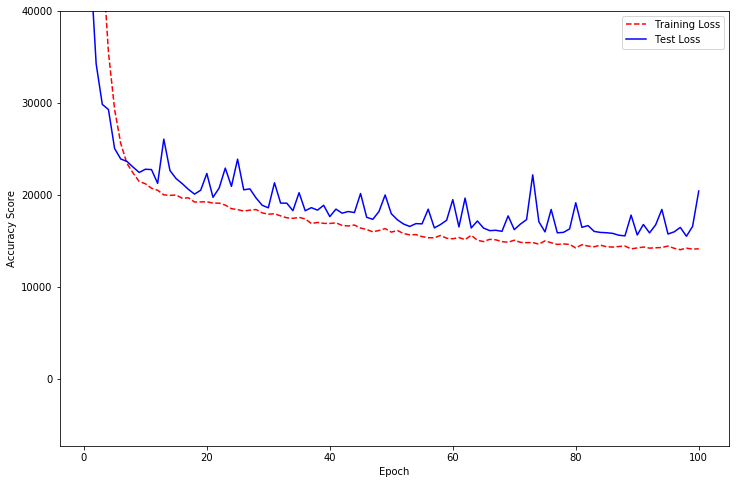

In [40]:
model4,history4 = model4_maker(X_train,y_train,X_test,y_test,epochs)

Train on 24267 samples, validate on 6067 samples


Epoch 1/100


 - 2s - loss: 511216.8125 - val_loss: 52283.0266
Epoch 2/100


 - 1s - loss: 84230.9350 - val_loss: 39336.8674
Epoch 3/100


 - 1s - loss: 65891.5259 - val_loss: 49134.0875
Epoch 4/100


 - 1s - loss: 48691.7719 - val_loss: 30925.9525
Epoch 5/100


 - 1s - loss: 40565.2152 - val_loss: 29241.7062
Epoch 6/100


 - 1s - loss: 33197.4350 - val_loss: 26410.3379
Epoch 7/100


 - 2s - loss: 28654.4131 - val_loss: 24772.5493
Epoch 8/100


 - 2s - loss: 25792.2992 - val_loss: 23766.6583
Epoch 9/100


 - 2s - loss: 23734.4215 - val_loss: 23749.6383
Epoch 10/100


 - 1s - loss: 22198.6578 - val_loss: 21991.0162
Epoch 11/100


 - 1s - loss: 21594.1657 - val_loss: 21814.2778
Epoch 12/100


 - 1s - loss: 20789.9682 - val_loss: 21612.7727
Epoch 13/100


 - 1s - loss: 20395.5419 - val_loss: 21447.9678
Epoch 14/100


 - 1s - loss: 20097.6565 - val_loss: 20733.0387
Epoch 15/100


 - 1s - loss: 19932.4359 - val_loss: 20801.9622
Epoch 16/100


 - 1s - loss: 19387.2313 - val_loss: 21530.9056
Epoch 17/100


 - 2s - loss: 19072.5304 - val_loss: 20120.9687
Epoch 18/100


 - 1s - loss: 19000.7892 - val_loss: 20600.8543
Epoch 19/100


 - 1s - loss: 19017.3672 - val_loss: 19501.0589
Epoch 20/100


 - 1s - loss: 18480.4017 - val_loss: 20229.2922
Epoch 21/100


 - 1s - loss: 18519.8617 - val_loss: 19324.8331
Epoch 22/100


 - 1s - loss: 18227.0521 - val_loss: 19460.6229
Epoch 23/100


 - 2s - loss: 18112.8115 - val_loss: 20051.3054
Epoch 24/100


 - 1s - loss: 17835.7548 - val_loss: 19750.1538
Epoch 25/100


 - 1s - loss: 17549.5421 - val_loss: 19096.6192
Epoch 26/100


 - 1s - loss: 17325.7469 - val_loss: 18547.6349
Epoch 27/100


 - 1s - loss: 17372.0368 - val_loss: 18835.5343
Epoch 28/100


 - 1s - loss: 17391.4928 - val_loss: 17915.0860
Epoch 29/100


 - 1s - loss: 17244.7229 - val_loss: 18276.8171
Epoch 30/100


 - 1s - loss: 16655.4192 - val_loss: 18264.4786
Epoch 31/100


 - 1s - loss: 16852.3394 - val_loss: 18010.8128
Epoch 32/100


 - 1s - loss: 16635.4770 - val_loss: 17798.9509
Epoch 33/100


 - 1s - loss: 16791.1981 - val_loss: 17902.2878
Epoch 34/100


 - 1s - loss: 16377.8727 - val_loss: 18481.8783
Epoch 35/100


 - 1s - loss: 16417.0109 - val_loss: 17452.4675
Epoch 36/100


 - 1s - loss: 16225.8672 - val_loss: 17591.3127
Epoch 37/100


 - 1s - loss: 15995.0690 - val_loss: 20206.7222
Epoch 38/100


 - 1s - loss: 16013.7176 - val_loss: 17162.7324
Epoch 39/100


 - 1s - loss: 15897.9446 - val_loss: 17334.5675
Epoch 40/100


 - 1s - loss: 15938.4327 - val_loss: 17149.1765
Epoch 41/100


 - 1s - loss: 16059.9484 - val_loss: 16909.0085
Epoch 42/100


 - 1s - loss: 15817.2009 - val_loss: 17216.2937
Epoch 43/100


 - 1s - loss: 15581.2166 - val_loss: 16854.5376
Epoch 44/100


 - 1s - loss: 15728.0998 - val_loss: 16912.3361
Epoch 45/100


 - 1s - loss: 15685.1449 - val_loss: 16477.7470
Epoch 46/100


 - 1s - loss: 15794.7379 - val_loss: 16765.3784
Epoch 47/100


 - 1s - loss: 15506.2256 - val_loss: 16685.3990
Epoch 48/100


 - 1s - loss: 15384.8731 - val_loss: 16747.4609
Epoch 49/100


 - 1s - loss: 15262.8711 - val_loss: 16616.1432
Epoch 50/100


 - 1s - loss: 15202.9117 - val_loss: 16408.2174
Epoch 51/100


 - 1s - loss: 15110.6271 - val_loss: 16664.8452
Epoch 52/100


 - 1s - loss: 15087.2022 - val_loss: 18678.8250
Epoch 53/100


 - 1s - loss: 15251.0731 - val_loss: 16769.6252
Epoch 54/100


 - 1s - loss: 15303.2671 - val_loss: 16049.3141
Epoch 55/100


 - 1s - loss: 15468.0977 - val_loss: 17214.7248
Epoch 56/100


 - 1s - loss: 15048.2189 - val_loss: 17807.4268
Epoch 57/100


 - 1s - loss: 15394.8408 - val_loss: 19276.2152
Epoch 58/100


 - 1s - loss: 15011.9071 - val_loss: 17355.2865
Epoch 59/100


 - 1s - loss: 15276.7646 - val_loss: 17738.5456
Epoch 60/100


 - 1s - loss: 14767.2345 - val_loss: 16376.1049
Epoch 61/100


 - 1s - loss: 14862.9634 - val_loss: 17614.5754
Epoch 62/100


 - 1s - loss: 14835.7339 - val_loss: 16186.6199
Epoch 63/100


 - 1s - loss: 14978.3451 - val_loss: 18397.6369
Epoch 64/100


 - 1s - loss: 14785.1766 - val_loss: 16442.2234


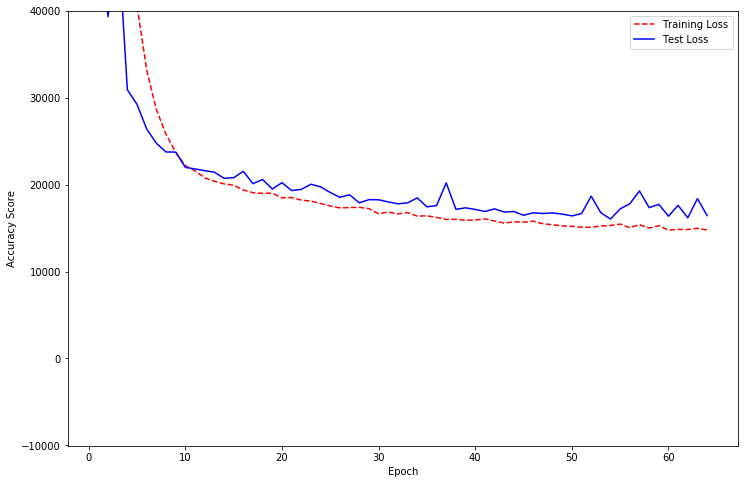

In [41]:
model5,history5 = model6_maker(X_train,y_train,X_test,y_test,epochs)

Train on 24267 samples, validate on 6067 samples


Epoch 1/100


 - 2s - loss: 398720.0921 - val_loss: 48338.8603
Epoch 2/100


 - 1s - loss: 59287.5013 - val_loss: 152764.6577
Epoch 3/100


 - 1s - loss: 46243.4557 - val_loss: 31236.1931
Epoch 4/100


 - 1s - loss: 34520.3449 - val_loss: 27564.3063
Epoch 5/100


 - 1s - loss: 28416.3089 - val_loss: 25504.3457
Epoch 6/100


 - 2s - loss: 25460.5466 - val_loss: 24546.2414
Epoch 7/100


 - 1s - loss: 23544.7299 - val_loss: 23384.1665
Epoch 8/100


 - 1s - loss: 22403.5197 - val_loss: 22883.2900
Epoch 9/100


 - 1s - loss: 21857.9267 - val_loss: 22435.4004
Epoch 10/100


 - 1s - loss: 21135.1252 - val_loss: 23787.1279
Epoch 11/100


 - 2s - loss: 20728.5405 - val_loss: 21332.9500
Epoch 12/100


 - 2s - loss: 20199.9601 - val_loss: 21491.9132
Epoch 13/100


 - 1s - loss: 20029.1266 - val_loss: 21252.7387
Epoch 14/100


 - 2s - loss: 20033.3456 - val_loss: 22697.1189
Epoch 15/100


 - 2s - loss: 19775.8032 - val_loss: 20892.5455
Epoch 16/100


 - 2s - loss: 19501.7335 - val_loss: 21253.1735
Epoch 17/100


 - 2s - loss: 19103.9802 - val_loss: 23422.0389
Epoch 18/100


 - 1s - loss: 18863.8126 - val_loss: 20196.2243
Epoch 19/100


 - 1s - loss: 18937.8806 - val_loss: 22594.9039
Epoch 20/100


 - 2s - loss: 18864.0727 - val_loss: 21239.7175
Epoch 21/100


 - 2s - loss: 18630.5891 - val_loss: 20456.5281
Epoch 22/100


 - 1s - loss: 18507.8798 - val_loss: 19662.3386
Epoch 23/100


 - 1s - loss: 18345.6722 - val_loss: 21170.2312
Epoch 24/100


 - 1s - loss: 18382.5956 - val_loss: 19660.3587
Epoch 25/100


 - 1s - loss: 18053.4272 - val_loss: 21272.4134
Epoch 26/100


 - 1s - loss: 17964.7324 - val_loss: 19765.8211
Epoch 27/100


 - 1s - loss: 18108.4547 - val_loss: 21514.3290
Epoch 28/100


 - 1s - loss: 17848.1722 - val_loss: 19385.9202
Epoch 29/100


 - 1s - loss: 17913.6059 - val_loss: 19263.9855
Epoch 30/100


 - 1s - loss: 17748.0443 - val_loss: 19084.5599
Epoch 31/100


 - 1s - loss: 17679.6657 - val_loss: 20267.3133
Epoch 32/100


 - 1s - loss: 17445.3956 - val_loss: 20624.8852
Epoch 33/100


 - 1s - loss: 17426.6562 - val_loss: 18892.3285
Epoch 34/100


 - 1s - loss: 17171.7694 - val_loss: 18995.6711
Epoch 35/100


 - 1s - loss: 17375.8476 - val_loss: 18698.6623
Epoch 36/100


 - 1s - loss: 17126.1757 - val_loss: 18924.7754
Epoch 37/100


 - 1s - loss: 17336.4485 - val_loss: 19895.2986
Epoch 38/100


 - 1s - loss: 17141.5102 - val_loss: 18456.9774
Epoch 39/100


 - 1s - loss: 17063.0567 - val_loss: 19727.5296
Epoch 40/100


 - 1s - loss: 17234.4340 - val_loss: 19246.2668
Epoch 41/100


 - 1s - loss: 17300.6689 - val_loss: 19115.5222
Epoch 42/100


 - 1s - loss: 17022.1849 - val_loss: 19453.0276
Epoch 43/100


 - 1s - loss: 17332.1292 - val_loss: 20988.2589
Epoch 44/100


 - 1s - loss: 16847.2895 - val_loss: 19752.7971
Epoch 45/100


 - 1s - loss: 17081.5098 - val_loss: 18410.0119
Epoch 46/100


 - 1s - loss: 16581.4631 - val_loss: 18552.3173
Epoch 47/100


 - 1s - loss: 16658.2108 - val_loss: 18255.3088
Epoch 48/100


 - 1s - loss: 16441.9827 - val_loss: 17877.5106
Epoch 49/100


 - 1s - loss: 16421.2170 - val_loss: 20262.9073
Epoch 50/100


 - 1s - loss: 16614.4360 - val_loss: 19087.6756
Epoch 51/100


 - 1s - loss: 16509.1499 - val_loss: 18959.2709
Epoch 52/100


 - 1s - loss: 16604.1520 - val_loss: 17928.8352
Epoch 53/100


 - 1s - loss: 16347.5326 - val_loss: 17799.8141
Epoch 54/100


 - 1s - loss: 16027.0106 - val_loss: 17353.3136
Epoch 55/100


 - 1s - loss: 16394.4381 - val_loss: 17466.0797
Epoch 56/100


 - 1s - loss: 16128.9472 - val_loss: 18597.7728
Epoch 57/100


 - 1s - loss: 15942.6130 - val_loss: 17488.5940
Epoch 58/100


 - 1s - loss: 16159.6305 - val_loss: 17537.7046
Epoch 59/100


 - 1s - loss: 15711.4086 - val_loss: 17871.5111
Epoch 60/100


 - 1s - loss: 15769.4837 - val_loss: 17341.1810
Epoch 61/100


 - 1s - loss: 15941.0550 - val_loss: 17130.5965
Epoch 62/100


 - 2s - loss: 15687.4172 - val_loss: 17332.1844
Epoch 63/100


 - 1s - loss: 15562.0239 - val_loss: 20068.2788
Epoch 64/100


 - 1s - loss: 15633.8960 - val_loss: 16968.4001
Epoch 65/100


 - 1s - loss: 15565.4570 - val_loss: 17623.9162
Epoch 66/100


 - 1s - loss: 15321.0508 - val_loss: 17481.0316
Epoch 67/100


 - 2s - loss: 15242.7201 - val_loss: 16820.6633
Epoch 68/100


 - 1s - loss: 15501.2787 - val_loss: 17341.2103
Epoch 69/100


 - 1s - loss: 15397.6998 - val_loss: 17306.1617
Epoch 70/100


 - 2s - loss: 15146.0142 - val_loss: 16480.5743
Epoch 71/100


 - 2s - loss: 15451.1567 - val_loss: 16607.5580
Epoch 72/100


 - 2s - loss: 14993.4945 - val_loss: 16765.5063
Epoch 73/100


 - 2s - loss: 14979.4730 - val_loss: 16184.1297
Epoch 74/100


 - 2s - loss: 14813.7819 - val_loss: 18879.2689
Epoch 75/100


 - 2s - loss: 14929.4394 - val_loss: 16267.4040
Epoch 76/100


 - 2s - loss: 14605.9115 - val_loss: 16079.4372
Epoch 77/100


 - 2s - loss: 14467.4000 - val_loss: 16681.6214
Epoch 78/100


 - 2s - loss: 14641.8942 - val_loss: 16224.8758
Epoch 79/100


 - 2s - loss: 14601.3288 - val_loss: 16361.1242
Epoch 80/100


 - 2s - loss: 14314.2819 - val_loss: 15813.4179
Epoch 81/100


 - 1s - loss: 14500.6080 - val_loss: 16555.0065
Epoch 82/100


 - 2s - loss: 14115.2791 - val_loss: 17400.6365
Epoch 83/100


 - 2s - loss: 14250.6707 - val_loss: 16914.0609
Epoch 84/100


 - 1s - loss: 14474.2604 - val_loss: 16874.6645
Epoch 85/100


 - 1s - loss: 14074.9858 - val_loss: 16281.5635
Epoch 86/100


 - 1s - loss: 13917.6953 - val_loss: 16384.6609
Epoch 87/100


 - 1s - loss: 14007.3888 - val_loss: 17175.4324
Epoch 88/100


 - 1s - loss: 14028.3898 - val_loss: 15629.6726
Epoch 89/100


 - 2s - loss: 13914.3928 - val_loss: 16160.1756
Epoch 90/100


 - 1s - loss: 13940.1708 - val_loss: 15697.0668
Epoch 91/100


 - 1s - loss: 14052.0615 - val_loss: 15599.1198
Epoch 92/100


 - 1s - loss: 13790.5384 - val_loss: 16064.9843
Epoch 93/100


 - 1s - loss: 13715.5657 - val_loss: 15463.7232
Epoch 94/100


 - 1s - loss: 14179.3009 - val_loss: 16032.4081
Epoch 95/100


 - 2s - loss: 13902.0981 - val_loss: 15387.2107
Epoch 96/100


 - 1s - loss: 14296.0752 - val_loss: 16838.3501
Epoch 97/100


 - 2s - loss: 13647.6294 - val_loss: 15721.5355
Epoch 98/100


 - 2s - loss: 13668.5757 - val_loss: 15787.0913
Epoch 99/100


 - 2s - loss: 13576.7577 - val_loss: 17649.0906
Epoch 100/100


 - 1s - loss: 13706.4063 - val_loss: 16160.0596


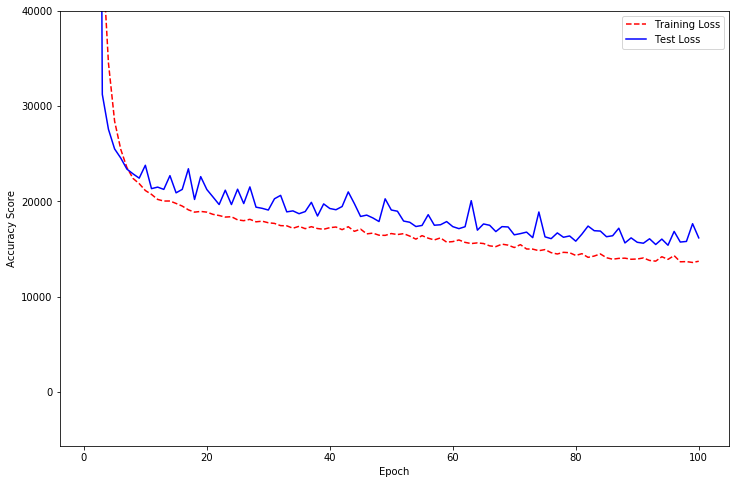

In [42]:
model6,history6 = model6_maker(X_train,y_train,X_test,y_test,epochs)

Train on 24267 samples, validate on 6067 samples


Epoch 1/120


 - 10s - loss: 453503.3382 - val_loss: 51811.3600
Epoch 2/120


 - 4s - loss: 57375.5066 - val_loss: 36887.4829
Epoch 3/120


 - 4s - loss: 42485.4436 - val_loss: 31304.2928
Epoch 4/120


 - 4s - loss: 33129.7400 - val_loss: 28892.1279
Epoch 5/120


 - 3s - loss: 29618.5724 - val_loss: 36398.6685
Epoch 6/120


 - 3s - loss: 27429.0329 - val_loss: 25609.5079
Epoch 7/120


 - 2s - loss: 25460.1346 - val_loss: 24761.3555
Epoch 8/120


 - 2s - loss: 24691.0763 - val_loss: 24351.1001
Epoch 9/120


 - 3s - loss: 23991.4350 - val_loss: 24492.1662
Epoch 10/120


 - 2s - loss: 23448.4278 - val_loss: 23437.7516
Epoch 11/120


 - 2s - loss: 22700.8866 - val_loss: 22984.2231
Epoch 12/120


 - 2s - loss: 22309.8576 - val_loss: 22708.5232
Epoch 13/120


 - 3s - loss: 22231.9357 - val_loss: 23858.6476
Epoch 14/120


 - 2s - loss: 21621.2421 - val_loss: 22111.6798
Epoch 15/120


 - 2s - loss: 20950.6900 - val_loss: 22110.3661
Epoch 16/120


 - 3s - loss: 20781.6219 - val_loss: 21151.5277
Epoch 17/120


 - 2s - loss: 20411.5698 - val_loss: 21092.7506
Epoch 18/120


 - 4s - loss: 19902.6233 - val_loss: 21608.7339
Epoch 19/120


 - 2s - loss: 19616.6977 - val_loss: 23434.3673
Epoch 20/120


 - 2s - loss: 19112.3854 - val_loss: 19764.6029
Epoch 21/120


 - 2s - loss: 18986.5505 - val_loss: 19824.4653
Epoch 22/120


 - 2s - loss: 19026.6958 - val_loss: 19245.5088
Epoch 23/120


 - 3s - loss: 18403.9270 - val_loss: 21522.2245
Epoch 24/120


 - 3s - loss: 18832.5276 - val_loss: 18908.4963
Epoch 25/120


 - 2s - loss: 18039.2554 - val_loss: 19088.1149
Epoch 26/120


 - 3s - loss: 17959.6028 - val_loss: 19903.5180
Epoch 27/120


 - 3s - loss: 18158.4503 - val_loss: 19447.7887
Epoch 28/120


 - 3s - loss: 17735.2175 - val_loss: 18786.5119
Epoch 29/120


 - 2s - loss: 17681.9891 - val_loss: 18228.5067
Epoch 30/120


 - 2s - loss: 17335.8680 - val_loss: 18506.7593
Epoch 31/120


 - 2s - loss: 17402.3650 - val_loss: 18827.0226
Epoch 32/120


 - 2s - loss: 18065.4553 - val_loss: 19363.4017
Epoch 33/120


 - 2s - loss: 17523.8736 - val_loss: 18601.1522
Epoch 34/120


 - 3s - loss: 17369.6418 - val_loss: 18340.0453
Epoch 35/120


 - 3s - loss: 17312.1277 - val_loss: 22691.4745
Epoch 36/120


 - 3s - loss: 17104.7251 - val_loss: 18734.1572
Epoch 37/120


 - 3s - loss: 17654.6716 - val_loss: 18239.4002
Epoch 38/120


 - 3s - loss: 16921.3905 - val_loss: 17828.4566
Epoch 39/120


 - 2s - loss: 16862.9867 - val_loss: 18534.7976
Epoch 40/120


 - 3s - loss: 16865.9914 - val_loss: 18559.0440
Epoch 41/120


 - 3s - loss: 16804.8605 - val_loss: 21241.2496
Epoch 42/120


 - 3s - loss: 16664.4350 - val_loss: 18696.5145
Epoch 43/120


 - 2s - loss: 16733.6914 - val_loss: 19965.7760
Epoch 44/120


 - 3s - loss: 16493.9932 - val_loss: 17564.0016
Epoch 45/120


 - 3s - loss: 17417.1999 - val_loss: 19598.2865
Epoch 46/120


 - 3s - loss: 16572.7304 - val_loss: 17522.0060
Epoch 47/120


 - 3s - loss: 16416.1865 - val_loss: 17241.6217
Epoch 48/120


 - 2s - loss: 16309.8450 - val_loss: 17434.1455
Epoch 49/120


 - 3s - loss: 16097.0538 - val_loss: 17798.5923
Epoch 50/120


 - 2s - loss: 16463.0917 - val_loss: 18235.4084
Epoch 51/120


 - 2s - loss: 16131.0690 - val_loss: 17980.3360
Epoch 52/120


 - 2s - loss: 16174.1562 - val_loss: 17947.5268
Epoch 53/120


 - 2s - loss: 16226.9556 - val_loss: 17527.2757
Epoch 54/120


 - 2s - loss: 16145.8555 - val_loss: 21372.2622
Epoch 55/120


 - 2s - loss: 16344.1677 - val_loss: 17581.1856
Epoch 56/120


 - 3s - loss: 16257.1540 - val_loss: 17026.5880
Epoch 57/120


 - 2s - loss: 15844.8925 - val_loss: 22473.5503
Epoch 58/120


 - 3s - loss: 16033.2392 - val_loss: 17156.1956
Epoch 59/120


 - 2s - loss: 15662.6251 - val_loss: 16675.5837
Epoch 60/120


 - 3s - loss: 15977.2646 - val_loss: 18740.5070
Epoch 61/120


 - 2s - loss: 15565.6721 - val_loss: 17070.0226
Epoch 62/120


 - 3s - loss: 15693.7752 - val_loss: 17837.0671
Epoch 63/120


 - 3s - loss: 15508.4515 - val_loss: 20897.6032
Epoch 64/120


 - 3s - loss: 15735.2276 - val_loss: 18886.9142
Epoch 65/120


 - 3s - loss: 15557.0865 - val_loss: 16792.6902
Epoch 66/120


 - 2s - loss: 15373.4022 - val_loss: 16823.4549
Epoch 67/120


 - 3s - loss: 15335.4804 - val_loss: 17769.3129
Epoch 68/120


 - 3s - loss: 15510.0272 - val_loss: 17597.2323
Epoch 69/120


 - 3s - loss: 15446.8502 - val_loss: 16417.2683
Epoch 70/120


 - 5s - loss: 15073.0821 - val_loss: 20122.3116
Epoch 71/120


 - 4s - loss: 15429.0243 - val_loss: 16908.1807
Epoch 72/120


 - 3s - loss: 15135.3743 - val_loss: 17028.8861
Epoch 73/120


 - 3s - loss: 15191.7753 - val_loss: 16896.4046
Epoch 74/120


 - 3s - loss: 15381.9311 - val_loss: 17087.8046
Epoch 75/120


 - 3s - loss: 14936.1291 - val_loss: 16185.9619
Epoch 76/120


 - 3s - loss: 14977.5711 - val_loss: 16000.8694
Epoch 77/120


 - 3s - loss: 14866.0795 - val_loss: 16388.5871
Epoch 78/120


 - 3s - loss: 15176.6951 - val_loss: 16414.8219
Epoch 79/120


 - 3s - loss: 14822.2158 - val_loss: 20653.4901
Epoch 80/120


 - 3s - loss: 14901.2668 - val_loss: 16865.8195
Epoch 81/120


 - 3s - loss: 14596.0297 - val_loss: 15811.8284
Epoch 82/120


 - 3s - loss: 14903.5398 - val_loss: 15943.4756
Epoch 83/120


 - 5s - loss: 14658.2417 - val_loss: 16726.0331
Epoch 84/120


 - 4s - loss: 14651.6055 - val_loss: 15792.8494
Epoch 85/120


 - 3s - loss: 14549.9220 - val_loss: 16518.6248
Epoch 86/120


 - 3s - loss: 15086.1244 - val_loss: 15629.0260
Epoch 87/120


 - 4s - loss: 14760.4370 - val_loss: 15846.0968
Epoch 88/120


 - 3s - loss: 14505.1473 - val_loss: 16719.6984
Epoch 89/120


 - 3s - loss: 14546.8807 - val_loss: 16968.4944
Epoch 90/120


 - 3s - loss: 14353.8524 - val_loss: 15999.2511
Epoch 91/120


 - 3s - loss: 14292.0531 - val_loss: 18670.2863
Epoch 92/120


 - 3s - loss: 14739.5003 - val_loss: 15524.4356
Epoch 93/120


 - 3s - loss: 14453.1785 - val_loss: 15591.5264
Epoch 94/120


 - 4s - loss: 14665.5574 - val_loss: 15803.1773
Epoch 95/120


 - 3s - loss: 14302.0480 - val_loss: 15546.5412
Epoch 96/120


 - 3s - loss: 14346.7827 - val_loss: 15556.4439
Epoch 97/120


 - 3s - loss: 14215.6095 - val_loss: 17493.2932
Epoch 98/120


 - 3s - loss: 14543.8240 - val_loss: 16288.8661
Epoch 99/120


 - 3s - loss: 14202.2007 - val_loss: 16303.2528
Epoch 100/120


 - 3s - loss: 14199.5887 - val_loss: 16634.1173
Epoch 101/120


 - 3s - loss: 14369.5800 - val_loss: 17766.0489
Epoch 102/120


 - 4s - loss: 14156.6795 - val_loss: 15852.0333


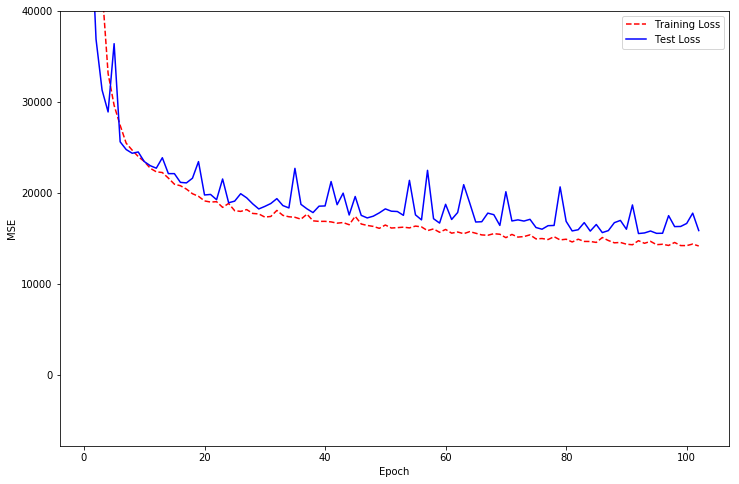

Train on 24267 samples, validate on 6067 samples


Epoch 1/120


 - 5s - loss: 486254.5338 - val_loss: 41021.9779
Epoch 2/120


 - 2s - loss: 65102.5412 - val_loss: 33369.4110
Epoch 3/120


 - 2s - loss: 44845.9416 - val_loss: 28952.5995
Epoch 4/120


 - 2s - loss: 36098.4889 - val_loss: 26973.3335
Epoch 5/120


 - 2s - loss: 30770.2867 - val_loss: 25887.5216
Epoch 6/120


 - 2s - loss: 28147.0337 - val_loss: 24910.2612
Epoch 7/120


 - 2s - loss: 25944.3095 - val_loss: 24458.2699
Epoch 8/120


 - 2s - loss: 24762.6539 - val_loss: 24087.8280
Epoch 9/120


 - 2s - loss: 23800.2217 - val_loss: 26899.8305
Epoch 10/120


 - 2s - loss: 23441.8853 - val_loss: 23412.3419
Epoch 11/120


 - 2s - loss: 22983.2741 - val_loss: 24701.9702
Epoch 12/120


 - 3s - loss: 22700.8774 - val_loss: 23259.3802
Epoch 13/120


 - 3s - loss: 22457.0476 - val_loss: 24310.0336
Epoch 14/120


 - 2s - loss: 22658.5180 - val_loss: 23957.9266
Epoch 15/120


 - 3s - loss: 22167.9488 - val_loss: 24110.4069
Epoch 16/120


 - 2s - loss: 22209.4449 - val_loss: 24228.6420
Epoch 17/120


 - 2s - loss: 22126.8377 - val_loss: 24674.8405
Epoch 18/120


 - 2s - loss: 22051.1294 - val_loss: 22778.2597
Epoch 19/120


 - 2s - loss: 22094.5959 - val_loss: 24011.2228
Epoch 20/120


 - 2s - loss: 21857.9283 - val_loss: 22850.5055
Epoch 21/120


 - 2s - loss: 21728.2497 - val_loss: 23091.7570
Epoch 22/120


 - 2s - loss: 21789.1379 - val_loss: 22844.2083
Epoch 23/120


 - 2s - loss: 21772.8729 - val_loss: 22512.4330
Epoch 24/120


 - 3s - loss: 21728.6006 - val_loss: 22451.8294
Epoch 25/120


 - 2s - loss: 21708.2117 - val_loss: 22523.0029
Epoch 26/120


 - 2s - loss: 21711.2589 - val_loss: 22357.0190
Epoch 27/120


 - 2s - loss: 21536.0755 - val_loss: 23495.1929
Epoch 28/120


 - 2s - loss: 21732.9242 - val_loss: 22133.5044
Epoch 29/120


 - 3s - loss: 21386.1249 - val_loss: 22016.8450
Epoch 30/120


 - 2s - loss: 21360.9810 - val_loss: 22284.4335
Epoch 31/120


 - 2s - loss: 21377.8027 - val_loss: 22977.3412
Epoch 32/120


 - 2s - loss: 21423.7197 - val_loss: 21843.2289
Epoch 33/120


 - 3s - loss: 21392.7005 - val_loss: 22346.8449
Epoch 34/120


 - 2s - loss: 21359.1344 - val_loss: 21690.1933
Epoch 35/120


 - 2s - loss: 21311.6143 - val_loss: 22207.0773
Epoch 36/120


 - 2s - loss: 21279.7598 - val_loss: 23270.3805
Epoch 37/120


 - 3s - loss: 21374.1270 - val_loss: 22028.2278
Epoch 38/120


 - 2s - loss: 21370.4703 - val_loss: 21759.7106
Epoch 39/120


 - 3s - loss: 21336.5870 - val_loss: 22018.0729
Epoch 40/120


 - 3s - loss: 21323.2373 - val_loss: 21720.6747
Epoch 41/120


 - 3s - loss: 21071.4155 - val_loss: 23495.6916
Epoch 42/120


 - 4s - loss: 20962.7595 - val_loss: 22192.8722
Epoch 43/120


 - 3s - loss: 21014.3630 - val_loss: 22243.4591
Epoch 44/120


 - 3s - loss: 21162.4636 - val_loss: 21676.4910
Epoch 45/120


 - 4s - loss: 20936.6693 - val_loss: 21856.7825
Epoch 46/120


 - 4s - loss: 20944.4412 - val_loss: 21661.3572
Epoch 47/120


 - 4s - loss: 20692.5814 - val_loss: 21385.4626
Epoch 48/120


 - 4s - loss: 20491.8476 - val_loss: 22140.4823
Epoch 49/120


 - 3s - loss: 20337.7648 - val_loss: 20783.1144
Epoch 50/120


 - 3s - loss: 20051.3375 - val_loss: 21061.2890
Epoch 51/120


 - 3s - loss: 20100.7093 - val_loss: 20742.7533
Epoch 52/120


 - 3s - loss: 19770.8098 - val_loss: 26328.9390
Epoch 53/120


 - 3s - loss: 19810.5992 - val_loss: 21679.9407
Epoch 54/120


 - 3s - loss: 19642.6727 - val_loss: 20320.7761
Epoch 55/120


 - 3s - loss: 19661.9798 - val_loss: 20752.2864
Epoch 56/120


 - 3s - loss: 19288.3624 - val_loss: 20595.8622
Epoch 57/120


 - 4s - loss: 19571.0870 - val_loss: 23031.4925
Epoch 58/120


 - 3s - loss: 19334.7096 - val_loss: 20591.4197
Epoch 59/120


 - 2s - loss: 19365.5907 - val_loss: 20722.7701
Epoch 60/120


 - 2s - loss: 19260.6495 - val_loss: 20452.8827
Epoch 61/120


 - 2s - loss: 19319.3868 - val_loss: 21469.7581
Epoch 62/120


 - 2s - loss: 19255.6845 - val_loss: 19899.5879
Epoch 63/120


 - 2s - loss: 19027.1188 - val_loss: 20558.1199
Epoch 64/120


 - 2s - loss: 19308.9815 - val_loss: 20213.9287
Epoch 65/120


 - 2s - loss: 18898.4309 - val_loss: 20309.1288
Epoch 66/120


 - 2s - loss: 18943.5670 - val_loss: 21641.9712
Epoch 67/120


 - 2s - loss: 19123.3276 - val_loss: 27756.6667
Epoch 68/120


 - 2s - loss: 19116.7820 - val_loss: 19985.9946
Epoch 69/120


 - 2s - loss: 18547.0957 - val_loss: 20329.6334
Epoch 70/120


 - 2s - loss: 18735.4367 - val_loss: 20752.5605
Epoch 71/120


 - 3s - loss: 18748.9877 - val_loss: 19707.9091
Epoch 72/120


 - 3s - loss: 18354.5547 - val_loss: 21603.2318
Epoch 73/120


 - 3s - loss: 18568.6382 - val_loss: 19578.3734
Epoch 74/120


 - 2s - loss: 18287.7087 - val_loss: 19115.5889
Epoch 75/120


 - 2s - loss: 18228.7854 - val_loss: 19214.4357
Epoch 76/120


 - 3s - loss: 17885.0033 - val_loss: 19291.5050
Epoch 77/120


 - 3s - loss: 18072.4121 - val_loss: 19045.0708
Epoch 78/120


 - 3s - loss: 17574.5895 - val_loss: 19781.7063
Epoch 79/120


 - 3s - loss: 17679.9646 - val_loss: 18655.4642
Epoch 80/120


 - 3s - loss: 17739.9266 - val_loss: 18609.6026
Epoch 81/120


 - 2s - loss: 17346.2117 - val_loss: 18827.6888
Epoch 82/120


 - 3s - loss: 17716.4900 - val_loss: 18248.7408
Epoch 83/120


 - 2s - loss: 17277.3868 - val_loss: 18691.5013
Epoch 84/120


 - 2s - loss: 17062.7204 - val_loss: 19659.7789
Epoch 85/120


 - 2s - loss: 17145.7595 - val_loss: 18233.3718
Epoch 86/120


 - 2s - loss: 16968.3385 - val_loss: 18038.8650
Epoch 87/120


 - 2s - loss: 17097.8158 - val_loss: 17930.1867
Epoch 88/120


 - 2s - loss: 16826.6235 - val_loss: 18096.1187
Epoch 89/120


 - 2s - loss: 17010.9129 - val_loss: 17739.8464
Epoch 90/120


 - 2s - loss: 16738.6631 - val_loss: 17803.7977
Epoch 91/120


 - 2s - loss: 16832.9152 - val_loss: 18117.7730
Epoch 92/120


 - 2s - loss: 16545.7602 - val_loss: 17857.9035
Epoch 93/120


 - 2s - loss: 16662.9436 - val_loss: 19457.7905
Epoch 94/120


 - 2s - loss: 16551.1563 - val_loss: 17854.4842
Epoch 95/120


 - 3s - loss: 16379.1801 - val_loss: 18159.9306
Epoch 96/120


 - 3s - loss: 16366.8340 - val_loss: 18402.0676
Epoch 97/120


 - 2s - loss: 16257.7916 - val_loss: 19503.8465
Epoch 98/120


 - 3s - loss: 16176.1181 - val_loss: 18256.3333
Epoch 99/120


 - 3s - loss: 16342.3271 - val_loss: 17788.0677


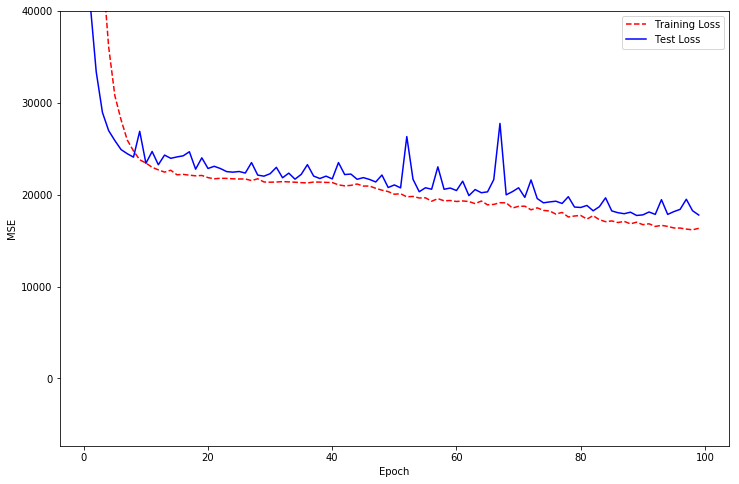

Train on 24267 samples, validate on 6067 samples


Epoch 1/120


 - 6s - loss: 310047.5493 - val_loss: 39549.0140
Epoch 2/120


 - 3s - loss: 64664.1313 - val_loss: 31913.2205
Epoch 3/120


 - 4s - loss: 40680.5345 - val_loss: 72569.0305
Epoch 4/120


 - 4s - loss: 32574.5065 - val_loss: 28865.3052
Epoch 5/120


 - 4s - loss: 26614.0634 - val_loss: 25313.6918
Epoch 6/120


 - 5s - loss: 24148.3105 - val_loss: 24359.6090
Epoch 7/120


 - 5s - loss: 22791.0860 - val_loss: 24300.7622
Epoch 8/120


 - 3s - loss: 21323.9027 - val_loss: 23691.2689
Epoch 9/120


 - 4s - loss: 20943.4492 - val_loss: 22128.9488
Epoch 10/120


 - 4s - loss: 20495.8169 - val_loss: 23749.0437
Epoch 11/120


 - 3s - loss: 19865.3946 - val_loss: 20302.4604
Epoch 12/120


 - 3s - loss: 19591.7282 - val_loss: 24530.6688
Epoch 13/120


 - 3s - loss: 19005.9994 - val_loss: 20025.3239
Epoch 14/120


 - 3s - loss: 18730.1057 - val_loss: 22082.0783
Epoch 15/120


 - 3s - loss: 18988.7252 - val_loss: 21191.9762
Epoch 16/120


 - 3s - loss: 18587.7762 - val_loss: 20237.6475
Epoch 17/120


 - 3s - loss: 18049.6522 - val_loss: 20617.6713
Epoch 18/120


 - 3s - loss: 17590.0692 - val_loss: 19759.1064
Epoch 19/120


 - 3s - loss: 17606.9698 - val_loss: 18654.9018
Epoch 20/120


 - 3s - loss: 17326.0161 - val_loss: 19000.9908
Epoch 21/120


 - 3s - loss: 17268.5403 - val_loss: 18951.6695
Epoch 22/120


 - 3s - loss: 17295.5730 - val_loss: 19946.0314
Epoch 23/120


 - 3s - loss: 17352.1507 - val_loss: 18548.9437
Epoch 24/120


 - 3s - loss: 17148.1939 - val_loss: 20070.0724
Epoch 25/120


 - 3s - loss: 16826.9880 - val_loss: 19717.8157
Epoch 26/120


 - 4s - loss: 16926.9999 - val_loss: 18828.9362
Epoch 27/120


 - 4s - loss: 16322.6933 - val_loss: 17701.7129
Epoch 28/120


 - 3s - loss: 16657.8355 - val_loss: 19632.9274
Epoch 29/120


 - 3s - loss: 16139.8816 - val_loss: 18060.7352
Epoch 30/120


 - 3s - loss: 15955.6329 - val_loss: 18126.0593
Epoch 31/120


 - 4s - loss: 16227.8576 - val_loss: 17576.5878
Epoch 32/120


 - 4s - loss: 16374.2260 - val_loss: 17373.9386
Epoch 33/120


 - 5s - loss: 15510.2163 - val_loss: 18666.5046
Epoch 34/120


 - 5s - loss: 16065.6318 - val_loss: 21907.4060
Epoch 35/120


 - 5s - loss: 15525.6503 - val_loss: 17255.5321
Epoch 36/120


 - 5s - loss: 15435.7240 - val_loss: 20515.5456
Epoch 37/120


 - 5s - loss: 15470.9868 - val_loss: 23419.1160
Epoch 38/120


 - 4s - loss: 15175.6574 - val_loss: 19368.0761
Epoch 39/120


 - 3s - loss: 15440.4787 - val_loss: 16534.1095
Epoch 40/120


 - 3s - loss: 15165.0931 - val_loss: 17634.6152
Epoch 41/120


 - 4s - loss: 14931.9717 - val_loss: 21415.6293
Epoch 42/120


 - 5s - loss: 14711.2793 - val_loss: 17617.1039
Epoch 43/120


 - 4s - loss: 14606.5517 - val_loss: 20163.5971
Epoch 44/120


 - 4s - loss: 14528.7007 - val_loss: 22436.0194
Epoch 45/120


 - 4s - loss: 14568.8325 - val_loss: 15970.1098
Epoch 46/120


 - 4s - loss: 14466.5348 - val_loss: 16217.4637
Epoch 47/120


 - 3s - loss: 14695.1667 - val_loss: 16112.5746
Epoch 48/120


 - 3s - loss: 14302.2591 - val_loss: 17911.2806
Epoch 49/120


 - 3s - loss: 14141.1359 - val_loss: 16019.2714
Epoch 50/120


 - 3s - loss: 13751.1859 - val_loss: 16298.3066
Epoch 51/120


 - 4s - loss: 14142.2439 - val_loss: 16836.1343
Epoch 52/120


 - 5s - loss: 14254.2034 - val_loss: 15652.5392
Epoch 53/120


 - 5s - loss: 13895.6973 - val_loss: 16463.4296
Epoch 54/120


 - 4s - loss: 13744.2860 - val_loss: 16476.5865
Epoch 55/120


 - 3s - loss: 14058.2607 - val_loss: 15553.1076
Epoch 56/120


 - 3s - loss: 13753.3161 - val_loss: 21068.0433
Epoch 57/120


 - 3s - loss: 13878.2472 - val_loss: 15960.1214
Epoch 58/120


 - 6s - loss: 13760.8092 - val_loss: 15577.6760
Epoch 59/120


 - 4s - loss: 13540.7012 - val_loss: 15624.6997
Epoch 60/120


 - 4s - loss: 13424.0563 - val_loss: 17014.3717
Epoch 61/120


 - 4s - loss: 13829.9380 - val_loss: 17064.4796
Epoch 62/120


 - 4s - loss: 13487.1651 - val_loss: 17636.3802
Epoch 63/120


 - 4s - loss: 13358.1197 - val_loss: 16819.7743
Epoch 64/120


 - 4s - loss: 13564.9616 - val_loss: 15573.3484
Epoch 65/120


 - 4s - loss: 13495.2317 - val_loss: 16154.0286


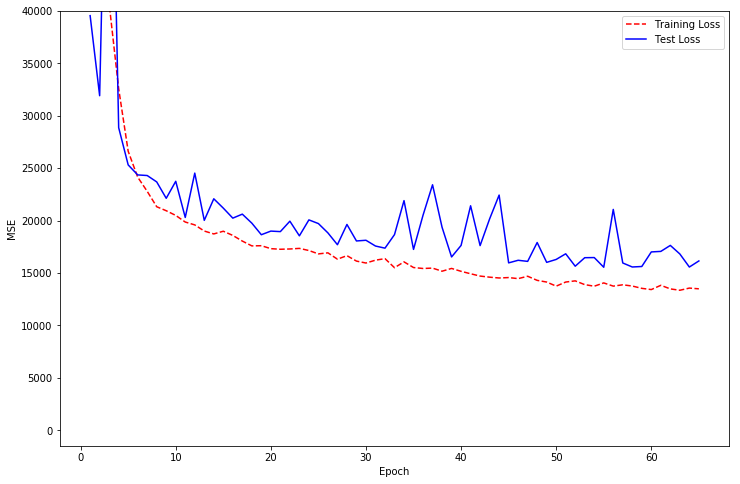

Train on 24267 samples, validate on 6067 samples


Epoch 1/120


 - 6s - loss: 445818.8796 - val_loss: 55136.9864
Epoch 2/120


 - 3s - loss: 64620.7683 - val_loss: 45902.9636
Epoch 3/120


 - 3s - loss: 46110.2710 - val_loss: 31721.2407
Epoch 4/120


 - 3s - loss: 37010.1802 - val_loss: 27711.6341
Epoch 5/120


 - 3s - loss: 29198.2963 - val_loss: 26239.4274
Epoch 6/120


 - 3s - loss: 25712.4630 - val_loss: 24400.2373
Epoch 7/120


 - 3s - loss: 23908.5187 - val_loss: 23944.6240
Epoch 8/120


 - 3s - loss: 22694.3742 - val_loss: 22518.9185
Epoch 9/120


 - 3s - loss: 21748.5420 - val_loss: 22297.2541
Epoch 10/120


 - 3s - loss: 21139.2349 - val_loss: 22167.8250
Epoch 11/120


 - 3s - loss: 21412.8204 - val_loss: 22030.7842
Epoch 12/120


 - 3s - loss: 20531.0047 - val_loss: 21923.1336
Epoch 13/120


 - 3s - loss: 20223.2872 - val_loss: 22014.5607
Epoch 14/120


 - 3s - loss: 19870.3968 - val_loss: 20979.2407
Epoch 15/120


 - 3s - loss: 19981.7883 - val_loss: 21151.3863
Epoch 16/120


 - 3s - loss: 19826.7817 - val_loss: 20747.9440
Epoch 17/120


 - 3s - loss: 19436.1023 - val_loss: 21199.1381
Epoch 18/120


 - 3s - loss: 19278.0288 - val_loss: 20307.4961
Epoch 19/120


 - 3s - loss: 19096.8219 - val_loss: 25061.1298
Epoch 20/120


 - 3s - loss: 19413.4265 - val_loss: 20356.1501
Epoch 21/120


 - 3s - loss: 18939.3316 - val_loss: 20177.7082
Epoch 22/120


 - 3s - loss: 18783.8164 - val_loss: 19980.8972
Epoch 23/120


 - 3s - loss: 18526.7595 - val_loss: 20352.1931
Epoch 24/120


 - 3s - loss: 18533.0277 - val_loss: 20856.2721
Epoch 25/120


 - 3s - loss: 18457.5011 - val_loss: 24120.0018
Epoch 26/120


 - 3s - loss: 18419.0347 - val_loss: 20251.6686
Epoch 27/120


 - 3s - loss: 18194.9587 - val_loss: 19511.9034
Epoch 28/120


 - 3s - loss: 18060.0442 - val_loss: 19424.5786
Epoch 29/120


 - 3s - loss: 17823.9584 - val_loss: 19544.6324
Epoch 30/120


 - 3s - loss: 17877.5749 - val_loss: 19012.1365
Epoch 31/120


 - 3s - loss: 17490.3945 - val_loss: 18785.2580
Epoch 32/120


 - 3s - loss: 17842.5745 - val_loss: 19555.0190
Epoch 33/120


 - 3s - loss: 17216.1540 - val_loss: 19018.2353
Epoch 34/120


 - 3s - loss: 17539.0974 - val_loss: 18742.6619
Epoch 35/120


 - 3s - loss: 17274.9346 - val_loss: 18832.5477
Epoch 36/120


 - 3s - loss: 17373.8455 - val_loss: 19291.8819
Epoch 37/120


 - 3s - loss: 16993.8534 - val_loss: 18614.8717
Epoch 38/120


 - 3s - loss: 17072.4218 - val_loss: 18659.5234
Epoch 39/120


 - 3s - loss: 16969.9087 - val_loss: 20642.3326
Epoch 40/120


 - 3s - loss: 16718.9836 - val_loss: 18394.3944
Epoch 41/120


 - 3s - loss: 16627.7549 - val_loss: 23742.8044
Epoch 42/120


 - 4s - loss: 16577.6956 - val_loss: 17360.7338
Epoch 43/120


 - 3s - loss: 16400.4370 - val_loss: 17394.4267
Epoch 44/120


 - 3s - loss: 16240.3037 - val_loss: 17087.9577
Epoch 45/120


 - 3s - loss: 16354.4184 - val_loss: 17698.0492
Epoch 46/120


 - 3s - loss: 16187.9391 - val_loss: 22774.5433
Epoch 47/120


 - 3s - loss: 16214.1755 - val_loss: 17390.9135
Epoch 48/120


 - 3s - loss: 15930.2954 - val_loss: 17836.8009
Epoch 49/120


 - 3s - loss: 16008.9172 - val_loss: 17138.0624
Epoch 50/120


 - 3s - loss: 15776.3606 - val_loss: 17730.8253
Epoch 51/120


 - 3s - loss: 15881.4389 - val_loss: 18272.0714
Epoch 52/120


 - 3s - loss: 15984.5617 - val_loss: 17637.1363
Epoch 53/120


 - 3s - loss: 15778.7129 - val_loss: 16782.3025
Epoch 54/120


 - 3s - loss: 15928.0432 - val_loss: 16691.3321
Epoch 55/120


 - 3s - loss: 15655.9829 - val_loss: 17461.4453
Epoch 56/120


 - 3s - loss: 15351.9347 - val_loss: 16697.7333
Epoch 57/120


 - 3s - loss: 15406.3092 - val_loss: 16864.4628
Epoch 58/120


 - 3s - loss: 15283.7913 - val_loss: 17237.8931
Epoch 59/120


 - 3s - loss: 15446.1117 - val_loss: 16783.3030
Epoch 60/120


 - 3s - loss: 15427.7536 - val_loss: 19927.2599
Epoch 61/120


 - 3s - loss: 15248.5764 - val_loss: 17627.6862
Epoch 62/120


 - 3s - loss: 15220.2397 - val_loss: 16448.1787
Epoch 63/120


 - 3s - loss: 15059.3952 - val_loss: 16194.3397
Epoch 64/120


 - 3s - loss: 14960.2904 - val_loss: 16452.7386
Epoch 65/120


 - 3s - loss: 15369.7915 - val_loss: 16044.5019
Epoch 66/120


 - 3s - loss: 15186.0532 - val_loss: 17166.7715
Epoch 67/120


 - 3s - loss: 14878.3949 - val_loss: 16533.8729
Epoch 68/120


 - 3s - loss: 14879.9030 - val_loss: 16629.1808
Epoch 69/120


 - 3s - loss: 14756.5948 - val_loss: 18570.9889
Epoch 70/120


 - 3s - loss: 14869.1479 - val_loss: 20452.7223
Epoch 71/120


 - 3s - loss: 15150.6628 - val_loss: 15954.8948
Epoch 72/120


 - 3s - loss: 14560.4644 - val_loss: 16680.4246
Epoch 73/120


 - 3s - loss: 14598.5698 - val_loss: 16454.5001
Epoch 74/120


 - 3s - loss: 14823.4201 - val_loss: 16510.9076
Epoch 75/120


 - 3s - loss: 14847.7533 - val_loss: 16513.3243
Epoch 76/120


 - 3s - loss: 14703.3088 - val_loss: 15943.9640
Epoch 77/120


 - 3s - loss: 14570.0583 - val_loss: 16102.2580
Epoch 78/120


 - 3s - loss: 14408.2100 - val_loss: 18415.6165
Epoch 79/120


 - 3s - loss: 14311.4870 - val_loss: 17263.9443
Epoch 80/120


 - 3s - loss: 14456.1477 - val_loss: 16511.2091
Epoch 81/120


 - 3s - loss: 14802.9971 - val_loss: 15738.2647
Epoch 82/120


 - 3s - loss: 14442.1254 - val_loss: 17264.5935
Epoch 83/120


 - 3s - loss: 14619.4725 - val_loss: 15843.4351
Epoch 84/120


 - 3s - loss: 14193.7380 - val_loss: 15696.6299
Epoch 85/120


 - 3s - loss: 14315.2821 - val_loss: 17265.8871
Epoch 86/120


 - 3s - loss: 14297.3269 - val_loss: 15850.2610
Epoch 87/120


 - 3s - loss: 14253.0305 - val_loss: 16313.8523
Epoch 88/120


 - 3s - loss: 14098.5111 - val_loss: 16827.8541
Epoch 89/120


 - 3s - loss: 14351.5007 - val_loss: 15742.8419
Epoch 90/120


 - 3s - loss: 14506.1330 - val_loss: 15646.7913
Epoch 91/120


 - 3s - loss: 13971.8897 - val_loss: 15297.1910
Epoch 92/120


 - 3s - loss: 14011.5422 - val_loss: 17753.7744
Epoch 93/120


 - 3s - loss: 14211.5324 - val_loss: 16226.6549
Epoch 94/120


 - 3s - loss: 14296.7932 - val_loss: 18792.0358
Epoch 95/120


 - 3s - loss: 14329.5077 - val_loss: 15643.3270
Epoch 96/120


 - 4s - loss: 13970.0742 - val_loss: 15870.8862
Epoch 97/120


 - 3s - loss: 14055.4508 - val_loss: 15605.6592
Epoch 98/120


 - 4s - loss: 14074.7010 - val_loss: 15730.1470
Epoch 99/120


 - 4s - loss: 14146.2884 - val_loss: 16910.1087
Epoch 100/120


 - 4s - loss: 13979.4602 - val_loss: 15609.9748
Epoch 101/120


 - 3s - loss: 13763.5788 - val_loss: 15331.8947


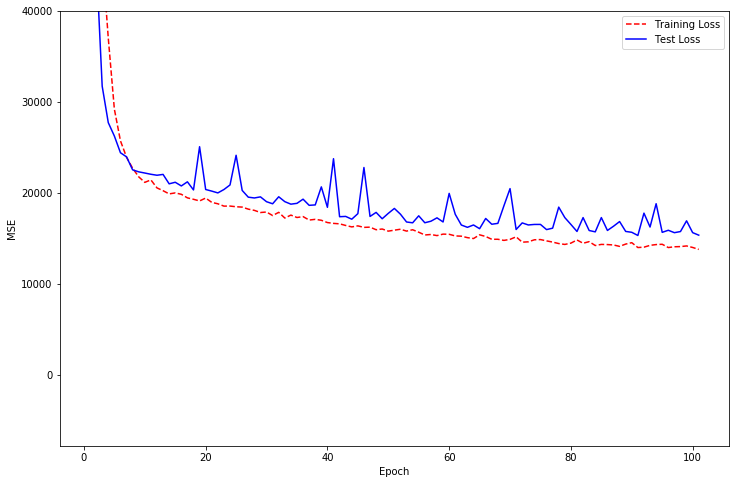

Train on 24267 samples, validate on 6067 samples


Epoch 1/120


 - 6s - loss: 395654.8447 - val_loss: 44333.5080
Epoch 2/120


 - 3s - loss: 61626.9898 - val_loss: 34338.6831
Epoch 3/120


 - 3s - loss: 43925.9305 - val_loss: 29962.1389
Epoch 4/120


 - 3s - loss: 33729.3691 - val_loss: 27105.5747
Epoch 5/120


 - 3s - loss: 28344.4480 - val_loss: 25433.7966
Epoch 6/120


 - 3s - loss: 25220.6058 - val_loss: 24721.5298
Epoch 7/120


 - 3s - loss: 23411.9868 - val_loss: 23119.1093
Epoch 8/120


 - 3s - loss: 22327.9224 - val_loss: 25579.3151
Epoch 9/120


 - 3s - loss: 22016.3003 - val_loss: 23196.5920
Epoch 10/120


 - 3s - loss: 20906.9556 - val_loss: 23522.7820
Epoch 11/120


 - 3s - loss: 20613.6930 - val_loss: 22565.7315
Epoch 12/120


 - 3s - loss: 20511.4562 - val_loss: 21247.4934
Epoch 13/120


 - 3s - loss: 19999.3597 - val_loss: 21722.6021
Epoch 14/120


 - 3s - loss: 19892.9780 - val_loss: 22197.3468
Epoch 15/120


 - 3s - loss: 19667.2940 - val_loss: 21007.0174
Epoch 16/120


 - 3s - loss: 19717.7563 - val_loss: 23115.9289
Epoch 17/120


 - 3s - loss: 19367.5695 - val_loss: 24508.0339
Epoch 18/120


 - 3s - loss: 19087.4524 - val_loss: 22257.8297
Epoch 19/120


 - 3s - loss: 18956.6887 - val_loss: 20049.8464
Epoch 20/120


 - 3s - loss: 18839.6919 - val_loss: 20983.6377
Epoch 21/120


 - 3s - loss: 18816.1734 - val_loss: 22644.8228
Epoch 22/120


 - 3s - loss: 18448.0649 - val_loss: 19911.6928
Epoch 23/120


 - 4s - loss: 18336.2682 - val_loss: 20129.3509
Epoch 24/120


 - 3s - loss: 18083.0358 - val_loss: 19417.0727
Epoch 25/120


 - 3s - loss: 18751.2392 - val_loss: 20293.1644
Epoch 26/120


 - 3s - loss: 17820.0794 - val_loss: 19309.9074
Epoch 27/120


 - 3s - loss: 17735.7727 - val_loss: 19021.9630
Epoch 28/120


 - 3s - loss: 17458.8565 - val_loss: 22200.2571
Epoch 29/120


 - 3s - loss: 17511.8064 - val_loss: 18840.9178
Epoch 30/120


 - 4s - loss: 17454.6900 - val_loss: 18976.3171
Epoch 31/120


 - 4s - loss: 17290.2398 - val_loss: 18452.6930
Epoch 32/120


 - 3s - loss: 17101.4713 - val_loss: 19025.9027
Epoch 33/120


 - 3s - loss: 17095.2034 - val_loss: 18565.3832
Epoch 34/120


 - 3s - loss: 17201.0991 - val_loss: 18025.5964
Epoch 35/120


 - 3s - loss: 17039.6085 - val_loss: 18418.5363
Epoch 36/120


 - 3s - loss: 16766.3768 - val_loss: 17870.7181
Epoch 37/120


 - 3s - loss: 16541.0823 - val_loss: 17906.2755
Epoch 38/120


 - 3s - loss: 16384.2148 - val_loss: 17943.3752
Epoch 39/120


 - 3s - loss: 16275.9954 - val_loss: 18894.2071
Epoch 40/120


 - 3s - loss: 16371.6763 - val_loss: 17528.9857
Epoch 41/120


 - 3s - loss: 16133.6502 - val_loss: 18003.9597
Epoch 42/120


 - 3s - loss: 15997.6445 - val_loss: 20053.2474
Epoch 43/120


 - 3s - loss: 16183.6858 - val_loss: 17510.8787
Epoch 44/120


 - 3s - loss: 15916.4170 - val_loss: 17620.9496
Epoch 45/120


 - 3s - loss: 15725.0595 - val_loss: 17834.3790
Epoch 46/120


 - 3s - loss: 15884.6231 - val_loss: 17077.6953
Epoch 47/120


 - 3s - loss: 15867.5014 - val_loss: 17436.9266
Epoch 48/120


 - 3s - loss: 15748.4569 - val_loss: 16706.9179
Epoch 49/120


 - 3s - loss: 15696.8877 - val_loss: 17282.0089
Epoch 50/120


 - 3s - loss: 15744.1789 - val_loss: 17304.8278
Epoch 51/120


 - 3s - loss: 15463.3268 - val_loss: 20987.1470
Epoch 52/120


 - 3s - loss: 15652.4548 - val_loss: 16313.5914
Epoch 53/120


 - 3s - loss: 15207.9093 - val_loss: 16658.0497
Epoch 54/120


 - 3s - loss: 15338.7086 - val_loss: 16402.5878
Epoch 55/120


 - 3s - loss: 15526.3702 - val_loss: 16505.8169
Epoch 56/120


 - 3s - loss: 14983.1030 - val_loss: 16374.2332
Epoch 57/120


 - 3s - loss: 14879.0544 - val_loss: 18148.6135
Epoch 58/120


 - 3s - loss: 15005.6802 - val_loss: 16473.4130
Epoch 59/120


 - 3s - loss: 15139.5558 - val_loss: 16639.3592
Epoch 60/120


 - 3s - loss: 15159.6022 - val_loss: 16246.5445
Epoch 61/120


 - 4s - loss: 15038.6975 - val_loss: 16098.2062
Epoch 62/120


 - 3s - loss: 14738.5773 - val_loss: 17261.1411
Epoch 63/120


 - 4s - loss: 14742.3855 - val_loss: 16949.3286
Epoch 64/120


 - 3s - loss: 14904.7387 - val_loss: 16645.5911
Epoch 65/120


 - 3s - loss: 14679.0383 - val_loss: 17739.3693
Epoch 66/120


 - 4s - loss: 14718.0013 - val_loss: 16790.0670
Epoch 67/120


 - 3s - loss: 14496.5644 - val_loss: 17547.7988
Epoch 68/120


 - 3s - loss: 14673.4568 - val_loss: 16343.1257
Epoch 69/120


 - 3s - loss: 14493.7573 - val_loss: 16489.8965
Epoch 70/120


 - 3s - loss: 14621.9500 - val_loss: 15871.0614
Epoch 71/120


 - 3s - loss: 14600.0171 - val_loss: 16921.3732
Epoch 72/120


 - 3s - loss: 14630.0540 - val_loss: 17399.3499
Epoch 73/120


 - 3s - loss: 14423.5650 - val_loss: 16301.4370
Epoch 74/120


 - 3s - loss: 14357.9902 - val_loss: 15937.1901
Epoch 75/120


 - 3s - loss: 14295.6195 - val_loss: 16999.7705
Epoch 76/120


 - 3s - loss: 14532.9238 - val_loss: 16208.3726
Epoch 77/120


 - 3s - loss: 14230.2258 - val_loss: 16541.7475
Epoch 78/120


 - 3s - loss: 14305.5578 - val_loss: 18151.0230
Epoch 79/120


 - 2s - loss: 14414.8745 - val_loss: 16257.4240
Epoch 80/120


 - 3s - loss: 14328.5762 - val_loss: 15875.0826


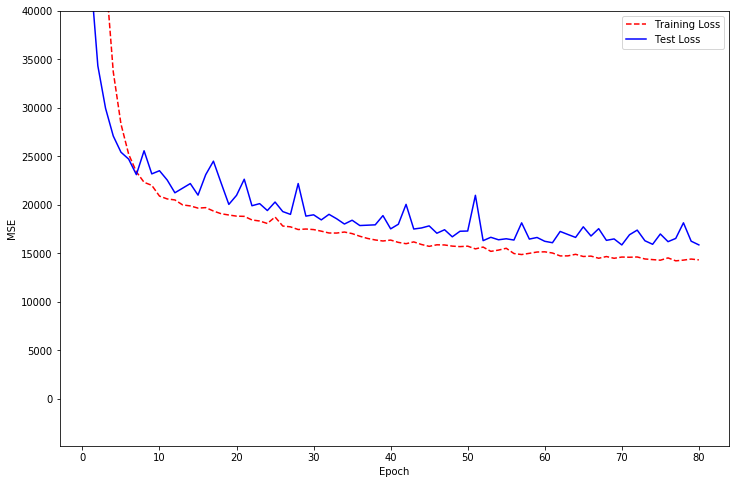

Train on 24267 samples, validate on 6067 samples


Epoch 1/120


 - 6s - loss: 445490.6184 - val_loss: 54361.3827
Epoch 2/120


 - 3s - loss: 75259.0071 - val_loss: 40245.3484
Epoch 3/120


 - 3s - loss: 54353.4051 - val_loss: 34574.6383
Epoch 4/120


 - 3s - loss: 42544.3194 - val_loss: 71302.6002
Epoch 5/120


 - 3s - loss: 37238.8711 - val_loss: 29304.4448
Epoch 6/120


 - 3s - loss: 31434.7097 - val_loss: 27431.6230
Epoch 7/120


 - 3s - loss: 28721.2539 - val_loss: 27489.6463
Epoch 8/120


 - 3s - loss: 27101.7902 - val_loss: 25369.6625
Epoch 9/120


 - 3s - loss: 25495.2748 - val_loss: 32077.5771
Epoch 10/120


 - 3s - loss: 24481.0568 - val_loss: 23810.3817
Epoch 11/120


 - 3s - loss: 23240.5873 - val_loss: 23467.0034
Epoch 12/120


 - 3s - loss: 22167.1492 - val_loss: 23594.0864
Epoch 13/120


 - 3s - loss: 21898.4315 - val_loss: 22711.1658
Epoch 14/120


 - 3s - loss: 21599.8319 - val_loss: 27533.3372
Epoch 15/120


 - 3s - loss: 20852.3446 - val_loss: 24778.8873
Epoch 16/120


 - 3s - loss: 20452.4763 - val_loss: 21370.7300
Epoch 17/120


 - 3s - loss: 20054.3808 - val_loss: 21617.4439
Epoch 18/120


 - 3s - loss: 19958.7623 - val_loss: 24067.5456
Epoch 19/120


 - 3s - loss: 19782.6342 - val_loss: 20517.5212
Epoch 20/120


 - 3s - loss: 19424.0182 - val_loss: 24314.0806
Epoch 21/120


 - 3s - loss: 19620.5929 - val_loss: 20024.7156
Epoch 22/120


 - 3s - loss: 19259.3739 - val_loss: 19961.6972
Epoch 23/120


 - 3s - loss: 19068.1188 - val_loss: 20146.1664
Epoch 24/120


 - 3s - loss: 18966.7267 - val_loss: 19644.5980
Epoch 25/120


 - 3s - loss: 18901.8175 - val_loss: 19984.1852
Epoch 26/120


 - 3s - loss: 18787.5977 - val_loss: 19769.5774
Epoch 27/120


 - 3s - loss: 18884.7426 - val_loss: 19755.0356
Epoch 28/120


 - 3s - loss: 18726.6529 - val_loss: 22290.7370
Epoch 29/120


 - 3s - loss: 18459.3674 - val_loss: 19854.2198
Epoch 30/120


 - 3s - loss: 18446.7992 - val_loss: 24222.9217
Epoch 31/120


 - 3s - loss: 18589.3273 - val_loss: 19658.1641
Epoch 32/120


 - 3s - loss: 18304.8103 - val_loss: 20089.5332
Epoch 33/120


 - 3s - loss: 18459.5920 - val_loss: 19283.3064
Epoch 34/120


 - 3s - loss: 18012.8708 - val_loss: 18919.7644
Epoch 35/120


 - 3s - loss: 18297.3618 - val_loss: 19521.0075
Epoch 36/120


 - 3s - loss: 17931.4282 - val_loss: 19113.8842
Epoch 37/120


 - 3s - loss: 17654.2406 - val_loss: 23879.0406
Epoch 38/120


 - 3s - loss: 18157.6011 - val_loss: 22795.7985
Epoch 39/120


 - 3s - loss: 17778.8940 - val_loss: 18848.3426
Epoch 40/120


 - 3s - loss: 18007.2626 - val_loss: 19168.1574
Epoch 41/120


 - 3s - loss: 17760.6687 - val_loss: 19301.3324
Epoch 42/120


 - 3s - loss: 17153.6851 - val_loss: 19184.1560
Epoch 43/120


 - 3s - loss: 17609.6795 - val_loss: 19602.5909
Epoch 44/120


 - 3s - loss: 17390.3518 - val_loss: 18560.1996
Epoch 45/120


 - 3s - loss: 16945.9172 - val_loss: 18404.3876
Epoch 46/120


 - 3s - loss: 17353.0933 - val_loss: 19515.3679
Epoch 47/120


 - 3s - loss: 17440.5349 - val_loss: 20211.6938
Epoch 48/120


 - 3s - loss: 16919.4583 - val_loss: 21412.1169
Epoch 49/120


 - 3s - loss: 16905.3982 - val_loss: 18616.5080
Epoch 50/120


 - 3s - loss: 17200.6508 - val_loss: 18432.2890
Epoch 51/120


 - 3s - loss: 16869.6820 - val_loss: 18044.2371
Epoch 52/120


 - 4s - loss: 16781.9926 - val_loss: 19213.0847
Epoch 53/120


 - 3s - loss: 16861.4101 - val_loss: 18226.5911
Epoch 54/120


 - 3s - loss: 16692.3234 - val_loss: 18045.4926
Epoch 55/120


 - 3s - loss: 16890.6494 - val_loss: 18842.2403
Epoch 56/120


 - 3s - loss: 16182.0460 - val_loss: 17959.4453
Epoch 57/120


 - 3s - loss: 16475.9739 - val_loss: 18314.4207
Epoch 58/120


 - 3s - loss: 16154.0781 - val_loss: 23034.1516
Epoch 59/120


 - 3s - loss: 16432.0974 - val_loss: 20854.9938
Epoch 60/120


 - 3s - loss: 16397.5425 - val_loss: 17910.1979
Epoch 61/120


 - 3s - loss: 16106.8610 - val_loss: 18552.9361
Epoch 62/120


 - 3s - loss: 16130.1723 - val_loss: 17785.9455
Epoch 63/120


 - 3s - loss: 16016.3852 - val_loss: 22809.0944
Epoch 64/120


 - 3s - loss: 16203.7013 - val_loss: 17337.4844
Epoch 65/120


 - 3s - loss: 16043.6075 - val_loss: 17381.7965
Epoch 66/120


 - 3s - loss: 15752.2797 - val_loss: 20791.0247
Epoch 67/120


 - 3s - loss: 16006.2260 - val_loss: 17762.6030
Epoch 68/120


 - 3s - loss: 15973.6109 - val_loss: 17280.1362
Epoch 69/120


 - 3s - loss: 15889.5632 - val_loss: 17464.8186
Epoch 70/120


 - 3s - loss: 15684.9580 - val_loss: 17661.9819
Epoch 71/120


 - 3s - loss: 15885.2327 - val_loss: 18222.2544
Epoch 72/120


 - 3s - loss: 15893.2942 - val_loss: 17024.4496
Epoch 73/120


 - 3s - loss: 15550.9842 - val_loss: 17037.5204
Epoch 74/120


 - 3s - loss: 15976.3639 - val_loss: 17447.0959
Epoch 75/120


 - 3s - loss: 15352.1974 - val_loss: 17465.6173
Epoch 76/120


 - 3s - loss: 15667.2868 - val_loss: 17394.3941
Epoch 77/120


 - 3s - loss: 15422.2118 - val_loss: 18044.5693
Epoch 78/120


 - 3s - loss: 15442.1440 - val_loss: 16921.3898
Epoch 79/120


 - 3s - loss: 15548.1192 - val_loss: 18724.1837
Epoch 80/120


 - 3s - loss: 15221.3862 - val_loss: 17093.0139
Epoch 81/120


 - 3s - loss: 15262.3699 - val_loss: 18960.8625
Epoch 82/120


 - 3s - loss: 15472.9196 - val_loss: 19041.9451
Epoch 83/120


 - 3s - loss: 15259.6111 - val_loss: 16734.5322
Epoch 84/120


 - 3s - loss: 15160.6832 - val_loss: 16902.9379
Epoch 85/120


 - 4s - loss: 15293.4292 - val_loss: 17126.6535
Epoch 86/120


 - 4s - loss: 15542.5673 - val_loss: 16966.7364
Epoch 87/120


 - 3s - loss: 15224.2101 - val_loss: 16513.0719
Epoch 88/120


 - 3s - loss: 15445.0671 - val_loss: 16844.5240
Epoch 89/120


 - 3s - loss: 14994.9204 - val_loss: 17302.7913
Epoch 90/120


 - 3s - loss: 15195.0748 - val_loss: 17053.2027
Epoch 91/120


 - 3s - loss: 15148.9186 - val_loss: 16605.1871
Epoch 92/120


 - 3s - loss: 14866.2521 - val_loss: 17130.4107
Epoch 93/120


 - 3s - loss: 15094.7261 - val_loss: 16518.2585
Epoch 94/120


 - 3s - loss: 14916.4612 - val_loss: 17695.4430
Epoch 95/120


 - 3s - loss: 14791.5401 - val_loss: 16822.7649
Epoch 96/120


 - 3s - loss: 14971.5333 - val_loss: 16574.9736
Epoch 97/120


 - 3s - loss: 14728.9232 - val_loss: 16832.4847


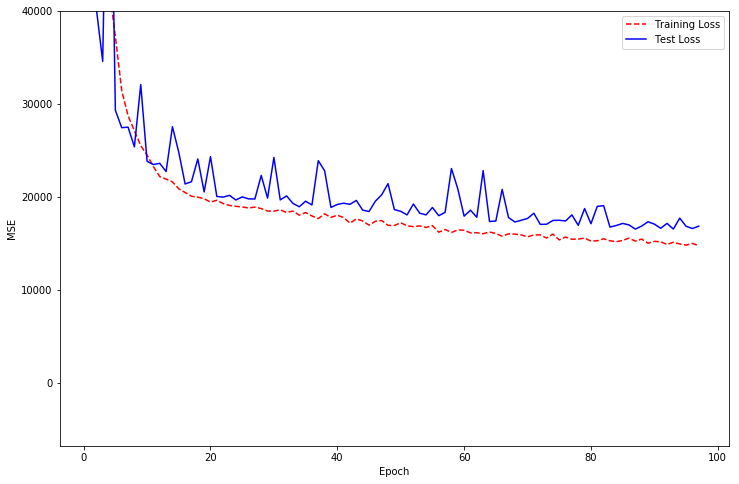

Train on 24267 samples, validate on 6067 samples


Epoch 1/120


 - 5s - loss: 2188803.8891 - val_loss: 2093287.6018
Epoch 2/120


 - 2s - loss: 1955405.9966 - val_loss: 1665333.2605
Epoch 3/120


 - 2s - loss: 1383266.5873 - val_loss: 1042909.3665
Epoch 4/120


 - 2s - loss: 791523.3448 - val_loss: 536098.2589
Epoch 5/120


 - 2s - loss: 381351.1418 - val_loss: 267003.3125
Epoch 6/120


 - 2s - loss: 212836.2252 - val_loss: 180808.7505
Epoch 7/120


 - 2s - loss: 155404.3543 - val_loss: 136641.7500
Epoch 8/120


 - 2s - loss: 107929.8573 - val_loss: 94137.3457
Epoch 9/120


 - 2s - loss: 81098.0499 - val_loss: 79414.7560
Epoch 10/120


 - 2s - loss: 69959.2715 - val_loss: 69216.7445
Epoch 11/120


 - 2s - loss: 60414.6950 - val_loss: 59899.2201
Epoch 12/120


 - 2s - loss: 51755.4442 - val_loss: 51540.3071
Epoch 13/120


 - 2s - loss: 44088.8125 - val_loss: 44271.6889
Epoch 14/120


 - 2s - loss: 37477.1178 - val_loss: 38039.0752
Epoch 15/120


 - 2s - loss: 31910.2122 - val_loss: 32824.9010
Epoch 16/120


 - 2s - loss: 27311.8368 - val_loss: 28485.1840
Epoch 17/120


 - 2s - loss: 23549.7677 - val_loss: 25021.9497
Epoch 18/120


 - 2s - loss: 20528.5043 - val_loss: 22103.5511
Epoch 19/120


 - 2s - loss: 18073.3424 - val_loss: 19723.1241
Epoch 20/120


 - 2s - loss: 16089.9234 - val_loss: 17844.3182
Epoch 21/120


 - 2s - loss: 14526.4662 - val_loss: 16402.7831
Epoch 22/120


 - 2s - loss: 13395.8485 - val_loss: 15423.8240
Epoch 23/120


 - 2s - loss: 12681.2653 - val_loss: 14871.8090
Epoch 24/120


 - 2s - loss: 12313.4496 - val_loss: 14603.9370
Epoch 25/120


 - 2s - loss: 12139.7775 - val_loss: 14479.7286
Epoch 26/120


 - 2s - loss: 12064.2051 - val_loss: 14427.2793
Epoch 27/120


 - 2s - loss: 12013.1689 - val_loss: 14389.8817
Epoch 28/120


 - 2s - loss: 11990.2503 - val_loss: 14362.1629
Epoch 29/120


 - 2s - loss: 11968.9580 - val_loss: 14358.0758
Epoch 30/120


 - 2s - loss: 11948.0072 - val_loss: 14338.7773
Epoch 31/120


 - 2s - loss: 11933.6999 - val_loss: 14326.3960
Epoch 32/120


 - 2s - loss: 11914.4614 - val_loss: 14308.5670
Epoch 33/120


 - 2s - loss: 11909.2246 - val_loss: 14303.4469
Epoch 34/120


 - 2s - loss: 11899.6879 - val_loss: 14327.4305
Epoch 35/120


 - 2s - loss: 11873.6748 - val_loss: 14373.6296
Epoch 36/120


 - 2s - loss: 11859.9119 - val_loss: 14293.4685
Epoch 37/120


 - 2s - loss: 11855.7244 - val_loss: 14281.0904
Epoch 38/120


 - 2s - loss: 11850.5991 - val_loss: 14304.6133
Epoch 39/120


 - 3s - loss: 11840.7385 - val_loss: 14285.0232
Epoch 40/120


 - 3s - loss: 11824.2576 - val_loss: 14275.1049
Epoch 41/120


 - 3s - loss: 11824.9957 - val_loss: 14304.1208
Epoch 42/120


 - 3s - loss: 11818.8959 - val_loss: 14258.9022
Epoch 43/120


 - 3s - loss: 11813.5245 - val_loss: 14262.5326
Epoch 44/120


 - 2s - loss: 11801.9942 - val_loss: 14256.9150
Epoch 45/120


 - 2s - loss: 11799.6862 - val_loss: 14262.5193
Epoch 46/120


 - 2s - loss: 11786.4522 - val_loss: 14254.3366
Epoch 47/120


 - 2s - loss: 11783.0556 - val_loss: 14257.2623
Epoch 48/120


 - 2s - loss: 11775.2828 - val_loss: 14247.7332
Epoch 49/120


 - 2s - loss: 11759.5443 - val_loss: 14329.8413
Epoch 50/120


 - 2s - loss: 11763.5680 - val_loss: 14284.6863
Epoch 51/120


 - 2s - loss: 11753.6046 - val_loss: 14240.7178
Epoch 52/120


 - 2s - loss: 11758.2203 - val_loss: 14251.6583
Epoch 53/120


 - 2s - loss: 11752.2305 - val_loss: 14238.6072
Epoch 54/120


 - 2s - loss: 11739.3356 - val_loss: 14243.8032
Epoch 55/120


 - 2s - loss: 11735.4683 - val_loss: 14267.3776
Epoch 56/120


 - 2s - loss: 11741.4320 - val_loss: 14237.1605
Epoch 57/120


 - 2s - loss: 11720.0679 - val_loss: 14309.6547
Epoch 58/120


 - 2s - loss: 11724.4949 - val_loss: 14242.5707
Epoch 59/120


 - 2s - loss: 11719.7891 - val_loss: 14239.5723
Epoch 60/120


 - 2s - loss: 11731.7489 - val_loss: 14247.5568
Epoch 61/120


 - 2s - loss: 11716.0551 - val_loss: 14297.0872
Epoch 62/120


 - 2s - loss: 11709.1204 - val_loss: 14315.0711
Epoch 63/120


 - 2s - loss: 11705.0405 - val_loss: 14278.5330
Epoch 64/120


 - 2s - loss: 11712.0923 - val_loss: 14259.1821
Epoch 65/120


 - 2s - loss: 11710.7949 - val_loss: 14234.7661
Epoch 66/120


 - 2s - loss: 11714.2083 - val_loss: 14285.8661
Epoch 67/120


 - 2s - loss: 11704.1479 - val_loss: 14294.4561
Epoch 68/120


 - 2s - loss: 11696.6416 - val_loss: 14311.3980
Epoch 69/120


 - 2s - loss: 11707.9677 - val_loss: 14238.2399
Epoch 70/120


 - 3s - loss: 11689.2789 - val_loss: 14283.8741
Epoch 71/120


 - 2s - loss: 11692.7474 - val_loss: 14235.9285
Epoch 72/120


 - 2s - loss: 11689.7555 - val_loss: 14249.1324
Epoch 73/120


 - 3s - loss: 11693.7633 - val_loss: 14276.3791
Epoch 74/120


 - 3s - loss: 11685.9428 - val_loss: 14267.8479
Epoch 75/120


 - 3s - loss: 11683.9722 - val_loss: 14254.7519


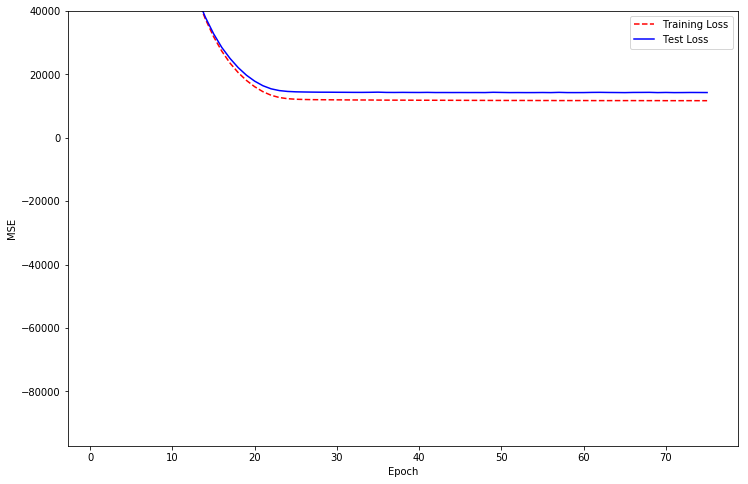

In [59]:
model_ensemble, history_ensemble, train_preds, test_preds = stack_ensemble(X_train,y_train,X_test,y_test,epochs=120)

In [64]:
y_train_preds = model_ensemble.predict(train_preds)
y_test_preds = model_ensemble.predict(test_preds)

In [67]:
#ensembled models MSE and R2
print('MSE Train:',mean_squared_error(y_train,y_train_preds), 'MSE Test:',mean_squared_error(y_test,y_test_preds))
print('R2 Train:',r2_score(y_train,y_train_preds),'R2 Test:', r2_score(y_test,y_test_preds))

MSE Train: 11693.375488726837 MSE Test: 14254.751745834148
R2 Train: 0.9771911412630978 R2 Test: 0.9721542578812009


In [ ]:
model_ensemble.save('model_ensemble.h5')

In [61]:
y_train.shape

(24267,)

In [62]:
train_preds.shape

(24267, 6)